<h1>Preprocessing</h1>

# Apa Itu Data Preprocessing?

Data preprocessing adalah tahap awal dalam proses analisis data yang melibatkan transformasi data mentah menjadi format yang lebih berguna dan efisien. Inisiatif ini diperlukan karena data mentah seringkali tidak lengkap, memiliki nilai yang hilang, atau memiliki format yang tidak konsisten.

Kualitas data memiliki korelasi langsung dengan keberhasilan setiap proyek yang melibatkan analisis data. Data yang tidak valid atau tidak lengkap dapat menghasilkan hasil analisis yang tidak akurat atau tidak dapat diandalkan. Oleh karena itu, preprocessing data menjadi langkah kunci untuk memastikan data yang digunakan dalam analisis adalah data yang baik.

![preprocessing](https://i.ibb.co/nrgQHt2/preprocessing.png)


Tahapan preprocessing data umumnya meliputi empat langkah utama, yaitu integrasi, pembersihan (cleaning), transformasi, dan reduksi dimensi. Berikut adalah penjelasan singkat untuk setiap tahapan dalam bahasa Indonesia:

1. *Integrasi*: Tahapan ini melibatkan penggabungan data dari berbagai sumber yang berbeda menjadi satu dataset yang utuh. Tujuan utamanya adalah menggabungkan informasi yang relevan dan penting dari berbagai sumber data.

2. *Pembersihan (Cleaning)*: Langkah ini fokus pada identifikasi dan penanganan nilai yang hilang, duplikat, atau anomali dalam dataset. Pembersihan data melibatkan penghapusan atau penggantian nilai yang tidak valid atau tidak sesuai dengan aturan yang telah ditentukan.

3. *Transformasi*: Transformasi data melibatkan konversi data ke format yang lebih sesuai atau berguna untuk analisis lebih lanjut. Contohnya termasuk normalisasi data numerik, encoding data kategorikal menjadi format numerik, dan pengubahan skala data.

4. *Reduksi Dimensi*: Langkah terakhir adalah reduksi dimensi, yang bertujuan untuk mengurangi kompleksitas dataset dengan mempertahankan informasi yang relevan. Teknik reduksi dimensi seperti Principal Component Analysis (PCA) atau Feature Selection digunakan untuk mengurangi jumlah fitur atau variabel dalam dataset tanpa kehilangan informasi penting.

<p>Processing data untuk ML melibatkan data engineering dan feature engineering. 

<ul>
    <li><b>Data engineering</b> adalah proses mengubah data mentah (raw data) menjadi data yang bersih (prepared data). Raw data adalah data yang masih belum berbentuk tabular dan belum dipersiapkan secara khusus untuk tugas yang akan dilakukan oleh model. Sementara prepared data adalah data yang sudah berbentuk tabular dengan nama kolom dan tipe data yang sesuai. Beberapa proses yang akan dilakukan pada data engineering adalah handling missing values dan </li> 
    <li><b>Feature engineering</b> adalah menyesuaikan data yang telah melewati tahap data engineering untuk membuat fitur yang dapat digunakan oleh model ML. Beberapa hal yang akan kita lakukan disini adalah encoding dan scaling</li>
</ul>    
</p>

<h3> Handle Missing Values </h3>

<p>Missing values, atau nilai yang hilang, dapat memiliki dampak signifikan pada akurasi analisis data, terutama saat menggunakan algoritma pembelajaran mesin. Pengaruhnya dapat bervariasi tergantung pada seberapa banyak data yang hilang dan pada cara penanganan yang diterapkan. Berikut adalah beberapa pengaruh utama dari missing values pada akurasi:

<ul>
    <li><b>Pengurangan Ukuran Sampel</b>: Missing values dapat mengurangi ukuran sampel yang tersedia untuk analisis, yang dapat mengurangi akurasi model. Semakin banyak nilai yang hilang, semakin banyak informasi yang hilang, yang dapat memengaruhi kemampuan model untuk mengenali pola dan membuat prediksi yang akurat.</li>
    <li><b>Bias dalam Analisis</b>: Jika missing values tidak ditangani dengan benar, ini dapat menyebabkan bias dalam analisis. Jika pola atau kecenderungan tertentu terkait dengan data yang hilang, ini dapat memengaruhi hasil analisis secara keseluruhan.</li>
    <li><b>Ketidakakuratan dalam Estimasi Statistik</b>: Jika missing values tidak ditangani, ini dapat mengakibatkan perkiraan statistik yang tidak akurat, seperti rata-rata, standar deviasi, atau korelasi antar variabel. Hal ini dapat memengaruhi interpretasi analisis dan membuat kesimpulan yang salah.</li>
    <li><b>Distorsi pada Pola Data</b>: Missing values dapat menyebabkan distorsi pada pola data yang sebenarnya, terutama jika pola tersebut berkaitan dengan data yang hilang. Ini dapat mengakibatkan model yang dilatih pada data yang tidak mewakili populasi secara keseluruhan</li>
</ul>

</p>

In [1]:
# Mengimpor pustaka yang diperlukan
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk membuat grafik
import seaborn as sns #Untuk visualisasi data statistik
from sklearn.preprocessing import LabelEncoder  # Untuk mengkodekan variabel kategori
from sklearn.preprocessing import MinMaxScaler  # Untuk penskalaan fitur min-max
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur
from sklearn.feature_selection import RFE  # Recursive Feature Elimination untuk pemilihan fitur
from sklearn.linear_model import LinearRegression  # Model regresi linear
from sklearn.impute import SimpleImputer  # Untuk mengisi nilai yang hilang
from sklearn.decomposition import PCA  # Principal Component Analysis untuk reduksi dimensi


In [3]:
df = pd.read_csv("RetailStorePerformanceDataset.csv")

In [34]:
df.isnull().sum()

Town                   0
Country                0
Store ID               0
Manager name           0
Staff                  0
Floor Space            0
Window                 0
Car park              14
Demographic score      0
Location              14
40min population       0
30 min population      0
20 min population      0
10 min population      0
Store age              0
Clearance space        0
Competition number     0
Competition score     27
Performance            0
dtype: int64

<p>Dapat dilihat pada kolom Competition score, Location, dan Car park terdapat missing value. Beberapa cara yang dapat digunakan untuk menangani missing value adalah:

<ul>
    <li><b>Drop missing value</b></li>
    <li><b>Diisi dengan nilai konstan</b></li>
    <li><b>Diisi dengan nilai mean, modus, atau nilai kuartil</b></li>
    <li><b>Imputer atau interpolasi</b></li>
</ul>


</p>

In [35]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')

df['Competition score'] = num_imputer.fit_transform(df[['Competition score']])

In [36]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

cols = ['Location', 'Car park']

for col in cols:
    df[col] = categorical_imputer.fit_transform(df[[col]]).squeeze()

<p>Sebagai contoh disini digunakan metode imputer untuk menangani missing value. Untuk data yang bersifat kategorikal digunakan strategi <i>most frequent</i> dan untuk data yang bersifat kontinu digunakan strategi mean </p>

In [37]:
df.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

# Data Visualisasi

Visualisasi data adalah representasi grafis dari informasi dan data menggunakan elemen-elemen visual seperti grafik, diagram, peta, dan plot lainnya. Tujuan utama dari visualisasi data adalah untuk mengkomunikasikan informasi secara efektif dan efisien kepada audiens atau pengguna, sehingga memudahkan pemahaman, analisis, dan pengambilan keputusan.

Sebagai salah satu bahasa pemrograman paling populer di kalangan praktisi data, Python memiliki banyak libraries dan tools yang bersifat open-source untuk mendukung pembuatan visualisasi data yang baik dan menarik. Berikut merupakan dua library Python yang paling sering digunakan oleh praktisi data di industri.

- Library matplotlib
- Library seaborn

### Pengenalan Library Matplotlib

Matplotlib merupakan sebuah library Python yang reliable dan komprehensif untuk mendukung kebutuhan pembuatan visualisasi data. Matplotlib menyediakan banyak object dan method yang memungkinkan kita membuat visualisasi data statis, animated, dan interaktif. Kita dapat melihat berbagai contoh visualisasi data yang dibuat menggunakan library ini pada tautan berikut :
https://matplotlib.org/stable/gallery/index.html 

Matplotlib memiliki sebuah submodule bernama matplotlib.pyplot yang sering dipanggil atau disingkat sebagai plt. Submodule ini menyediakan sebuah fungsi untuk membuat sebuah figure yang merupakan sebuah area atau kanvas kosong untuk membuat visualisasi data. Selain itu, plt juga menyediakan banyak fungsi untuk mendefinisikan berbagai jenis visualisasi data beserta dekorasinya, seperti label, title, dll.

Sebagai library visualisasi data yang komprehensif, matplotlib juga memungkinkan kita untuk memodifikasi berbagai tampilan visual sehingga dapat disesuaikan dengan kebutuhan. Tidak hanya itu, ia juga memungkinkan kita untuk menyimpan hasil visualisasi data yang telah dibuat ke dalam berbagai format penyimpanan, seperti png, jpeg, pdf, dll.  

### Pengenalan Seaborn

Selain matplotlib, library lain yang sering digunakan untuk visualisasi data adalah seaborn. Seaborn merupakan library Python yang spesifik digunakan untuk membuat visualisasi data yang atraktif dan informatif. Library ini memanfaatkan matplotlib untuk menampilkan grafik visualisasi data.

Sebagai salah satu library visualisasi data yang andal, seaborn menyediakan berbagai bentuk visual untuk merepresentasikan data secara lebih menarik dan informatif. Kita dapat melihat berbagai contoh visualisasi data yang dibuat menggunakan library ini pada tautan berikut: https://seaborn.pydata.org/examples/index.html

### Kesalahan dalam Visualisasi Data

Sederhananya, visualisasi data yang buruk merupakan bentuk visual yang tidak mampu menyampaikan pesan dan informasi terkait data secara baik serta efisien. Umumnya visualisasi data yang buruk memuat salah satu dari tiga masalah berikut.

##### A. Misleading
Masalah pertama dalam visualisasi data yang buruk ialah misleading information yang mampu mengakibatkan kesalahan dalam pengambilan kesimpulan dari sebuah data. Berikut contoh visualisasi data yang bisa mengakibatkan misleading information [10].

![Misleading](https://i.ibb.co/n10hrym/misleading.png)

Apa yang ada di benak kita ketika melihat visualisasi data tersebut? Tentunya kita akan melihat bahwa terdapat gap yang cukup besar dari kedua nilai tersebut. Hal ini contoh kesalahan pengambilan kesimpulan karena buruknya sebuah visualisasi data.

Apakah kita bisa menebak kesalahan apa yang mengakibatkan visualisasi data di atas menghasilkan kesimpulan yang salah? Yap, benar sekali visualisasi datanya tidak mulai dari nol sehingga terkesan ada gap yang cukup besar dari kedua nilai tersebut. Berikut merupakan contoh perbaikan dari visualisasi tersebut.

![Misleading](https://i.ibb.co/bLcQ59P/misleading2.png)

##### B. Hides

Selain misleading information, masalah lain yang umum dijumpai dalam visualisasi data yang buruk ialah menyembunyikan informasi tertentu. Berikut contoh visualisasi data yang menyembunyikan informasi penting dari sebuah data [10].

![Hides](https://i.ibb.co/vqM32qP/hides.png)

Berdasarkan visualisasi data di atas bisakah kita menjawab berapa besar market share yang dimiliki supplier A? Lalu, supplier manakah yang memiliki market share terbesar? Anda mungkin akan kesulitan dalam menjawab kedua pertanyaan tersebut karena banyak sekali informasi yang disembunyikan dari visualisasi tersebut.

#### C.  Distracts

Masalah lain yang mungkin terjadi ialah distraksi. Visualisasi data yang buruk sering kali menyertakan komponen visual yang seharusnya tidak dibutuhkan dan malah mengganggu proses pengambilan kesimpulan dari sebuah visualisasi data. Berikut merupakan contoh visualisasi data yang memuat komponen visual yang tidak dibutuhkan.

![Distracts](https://i.ibb.co/fSKjxFr/distracts.png)

Pada contoh visualisasi di atas, kita menggunakan warna untuk membedakan kategori pada data tersebut. Hal ini sebenarnya tidak dibutuhkan karena informasi terkait hal ini sudah tersedia pada sumbu x.

Warna merupakan komponen visual yang penting dalam visualisasi data. Oleh karena itu, kita bisa menggunakannya untuk menyampaikan pesan yang menarik dan mempermudah orang lain untuk memahami data yang kita miliki. Gambar di bawah ini merupakan contoh visualisasi data yang baik dalam penggunaan warna untuk menyorot bagian tertentu.

![Distracts](https://i.ibb.co/3BHpw1B/distracts2.png)

### Prinsip Desain dalam Visualisasi Data

Jika ditelisik secara mendasar, visualisasi data merupakan proses dalam mengubah data ke dalam bentuk visual menggunakan berbagai elemen visual. Berikut merupakan beberapa elemen visual yang umum digunakan untuk membuat visualisasi data.

1. *Position*: elemen ini akan membantu kita merepresentasikan titik data menggunakan sumbu tertentu (seperti sumbu X, Y, dan Z) sebagai acuan.

2. *Size*: ukuran (panjang atau lebar) merupakan elemen visual yang umumnya kita gunakan untuk membedakan serta membandingkan nilai dari kategori atau titik data tertentu.  

3. *Shape*: bentuk merupakan salah satu elemen visual yang dapat digunakan untuk membedakan kategori atau titik data tertentu. 

4. *Color*: selain bentuk, warna juga merupakan pilihan elemen visual lain yang dapat digunakan untuk membedakan kategori atau titik data tertentu. Ketika menggunakan elemen ini, kita harus ingat bahwa tidak semua orang memiliki kemampuan untuk membedakan warna dengan baik.

5. *Texture*: penambahan tekstur atau pola tertentu bisa menjadi alternatif lain dalam membedakan kategori atau titik data tertentu.

6. *Angle*: pada beberapa pilihan bentuk visualisasi data, sudut merupakan salah satu elemen visual yang digunakan untuk merepresentasikan nilai dari suatu data.

Oke, itulah keenam elemen visual yang biasa digunakan dalam membuat visualisasi data. Tugas kita sebagai praktisi data ialah mencari cara untuk menerapkan seluruh elemen visual tersebut secara efektif untuk menyiratkan kisah dari sebuah data.

### Jenis Visualisasi Data Paling Umum 

1. *Histogram* : Digunakan untuk menampilkan distribusi frekuensi dari data numerik. Histogram membagi rentang nilai data ke dalam interval-interval dan menghitung jumlah observasi yang jatuh dalam setiap interval.

2. *Diagram Batang (Bar Chart)* : Menggunakan batang-batang vertikal atau horizontal untuk membandingkan nilai-nilai kategori atau grup data yang berbeda.

3. *Diagram Garis (Line Chart)* : Menunjukkan perubahan atau tren dari suatu variabel secara berurutan dengan menggunakan garis yang menghubungkan titik-titik data.

4. *Diagram Lingkaran (Pie Chart)* : Menggunakan bentuk lingkaran untuk menunjukkan proporsi relatif dari kategori atau grup data yang berbeda dalam keseluruhan data.

5. *Diagram Kotak (Box Plot)* : Menampilkan distribusi data numerik melalui kuartil, nilai ekstrem, dan outlier.

6. *Diagram Scatter (Scatter Plot)* : Menunjukkan hubungan antara dua variabel numerik dengan menempatkan titik-titik data pada koordinat yang sesuai.

7. *Heatmap* : Digunakan untuk memvisualisasikan data dalam bentuk matriks dengan menggunakan warna untuk menunjukkan nilai intensitas pada setiap sel.

#### 1. Histogram

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


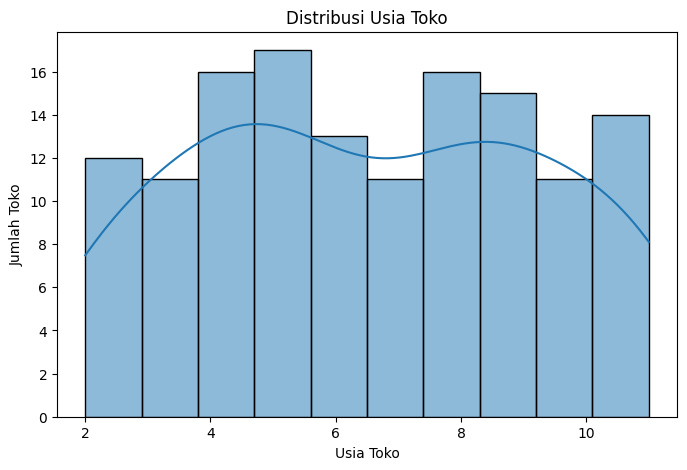

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Store age'], bins=10, kde=True)
plt.title('Distribusi Usia Toko')
plt.xlabel('Usia Toko')
plt.ylabel('Jumlah Toko')
plt.show()

Dari visualisasi ini didapatkan berapa banyak jumlah toko dalam usia sekian

#### 2. Bar Chart

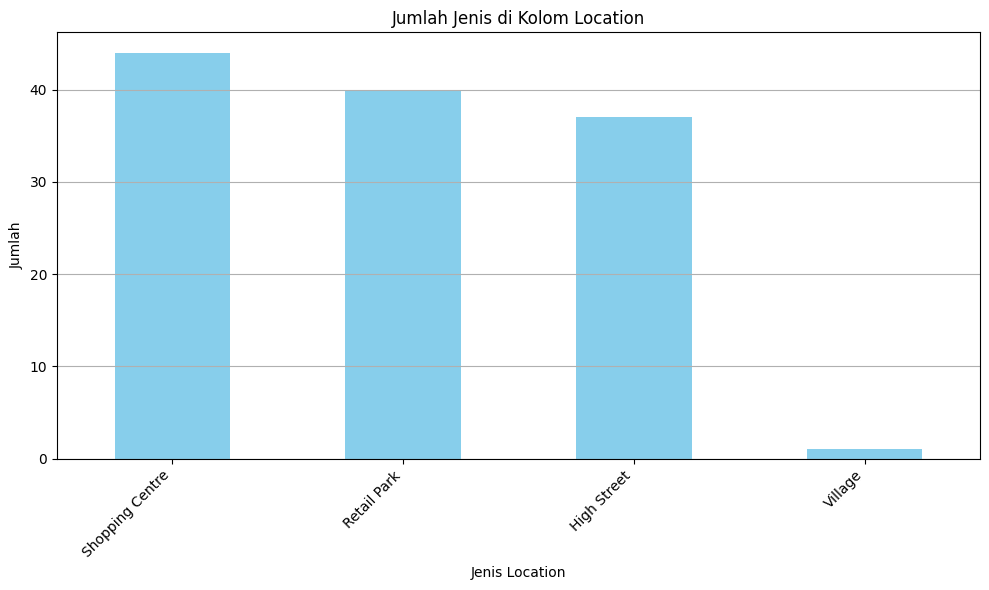

In [5]:
# Menghitung jumlah kemunculan setiap nilai unik di kolom 'Location'
location_counts = df['Location'].value_counts()

# Membuat bar chart berdasarkan jumlah jenis di kolom 'Location'
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')  # Mengubah warna batang menjadi biru langit
plt.title('Jumlah Jenis di Kolom Location')
plt.xlabel('Jenis Location')
plt.ylabel('Jumlah')
plt.grid(axis='y')  # Menampilkan grid hanya pada sumbu y
plt.xticks(rotation=45, ha='right')  # Mengatur rotasi label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Untuk menghitung rata-rata jumlah untuk setiap lokasi (Location)

#### 3. Line Chart

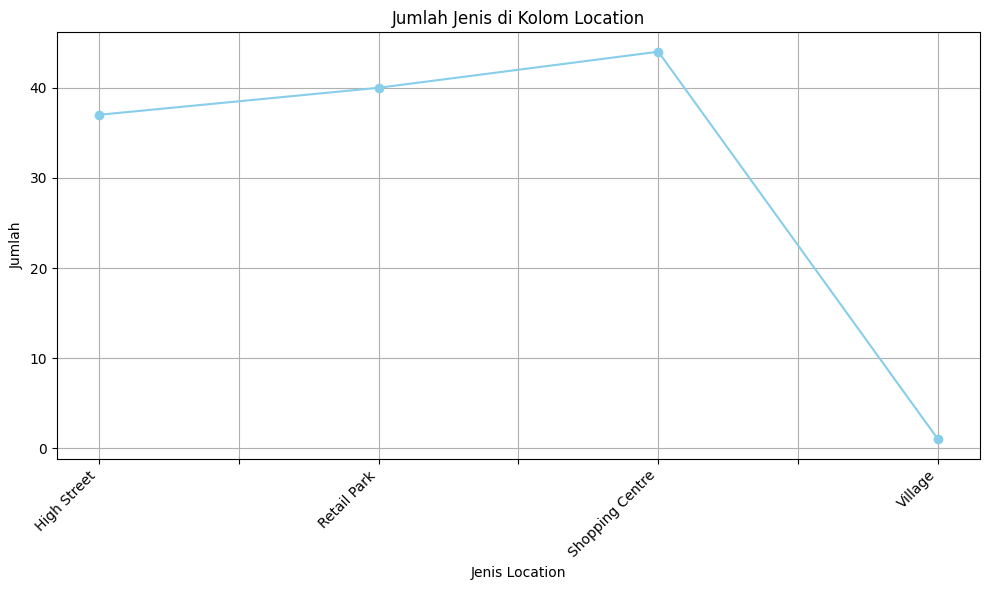

In [6]:
# Menghitung jumlah kemunculan setiap nilai unik di kolom 'Location'
location_counts = df['Location'].value_counts().sort_index()

# Membuat line chart berdasarkan jumlah jenis di kolom 'Location'
plt.figure(figsize=(10, 6))
location_counts.plot(kind='line', marker='o', color='skyblue')  # Mengubah warna garis menjadi biru langit
plt.title('Jumlah Jenis di Kolom Location')
plt.xlabel('Jenis Location')
plt.ylabel('Jumlah')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Mengatur rotasi label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Sebenarnya kolom ini tidak cocok untuk divisualisasikan melalui line chart namun dalam dataset tidak ada kolom lain yang bisa dijadikan line chart. Namun pada penerapannya line chart biasa digunakan untuk bagaimana pertumbuhan suatu masalah dalam rentan waktu tertentu misal pada gambar dibawah

![LineChart](https://i.ibb.co/fXSfgyc/linechart.png)

#### 4. Pie Chart

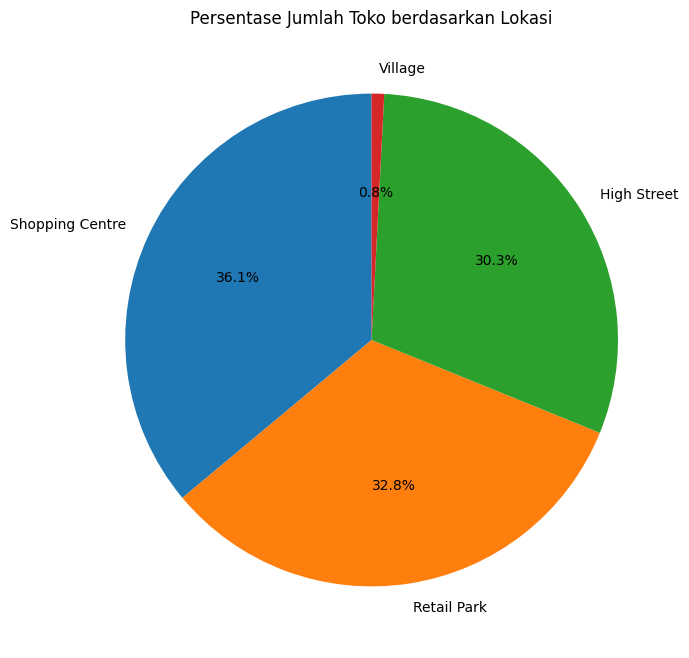

In [7]:
plt.figure(figsize=(8, 8))
location_counts = df['Location'].value_counts()
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jumlah Toko berdasarkan Lokasi')
plt.show()

Dari visualisasi ini dapat dilihat presentasi toko dari tiap lokasi yang ada

### 5. Count Plot

In [8]:
df_copy = df.copy()


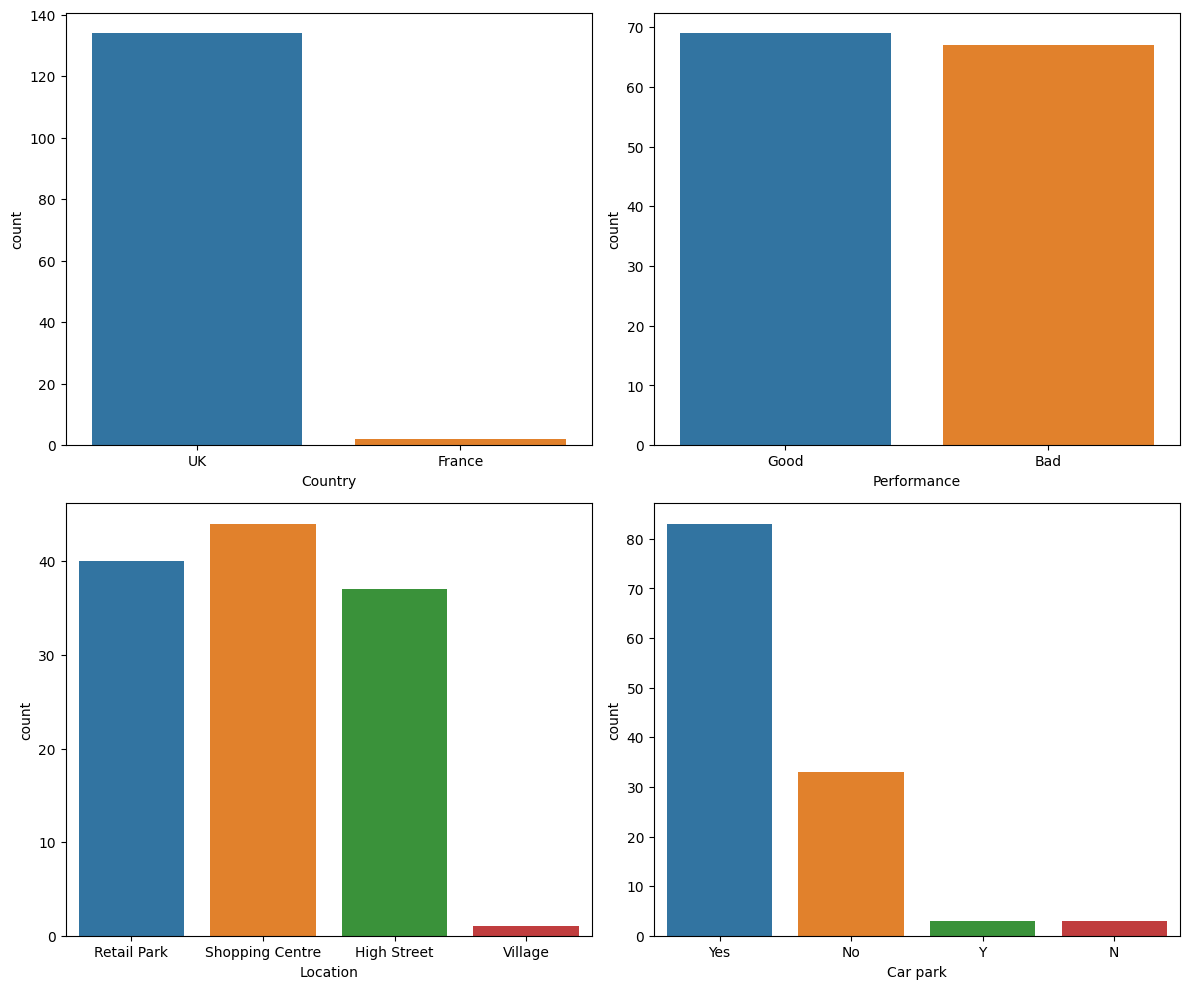

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Country', data=df_copy, ax=axes[0, 0])
sns.countplot(x='Performance', data=df_copy, ax=axes[0, 1])
sns.countplot(x='Location', data=df_copy, ax=axes[1, 0])
sns.countplot(x='Car park', data=df_copy, ax=axes[1, 1])

plt.tight_layout()

plt.show()

Dari visualisasi ini kita dapat mengetahui jumlah jenis isi dari 4 kolom dalam dataset

Untuk visualisasi lain seperti boxplot, scatterplot, dan heatmap akan ditampilkan dibagian setelah ini langsung dengan studi kasus yang penting diperhatikan

<h2> Handling Categorical Data </h2>

<h3>Pengertian Data Categorical</h3>

<p>Data categorial adalah jenis data yang mewakili kategori atau label, bukan nilai numerik yang kontinu. Data ini terdiri dari sejumlah kategori atau kelompok yang berbeda, yang sering kali mewakili atribut atau karakteristik tertentu dari suatu objek. Data kategorial tidak dapat diurutkan secara berurutan, tetapi hanya dapat dikategorikan ke dalam grup yang berbeda. Contoh umum dari data kategorial termasuk jenis kelamin, status pernikahan, kelas sosial, atau jenis produk.</p>

In [38]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

le = LabelEncoder()
lb = LabelBinarizer()
oh = OneHotEncoder()

In [39]:
# Copy df for EDA
df_copy = df.copy()

<h3>Metode Encoding</h3>
<p>
Encoding adalah pengubahan data kategorikal yang berbentuk string menjadi angka agar dapat dipahami oleh model. Metode encoding yang akan kita bahas adalah Label Encoder, Label Binarizer, dan One Hot Encoder.
</p>

In [40]:
def handle_encoding(df, method, columns):
    if method == oh:
        for column in columns:
            df_transformed = oh.fit_transform(df[[column]]).toarray()
            df_encoded = pd.DataFrame(df_transformed, columns=oh.get_feature_names_out([column]))
            df = pd.concat([df, df_encoded], axis=1).drop(columns=column)
    else:
        for column in columns:
            df[column] = method.fit_transform(df[column])
        
    return df

df = handle_encoding(df, le, ['Country', 'Location', 'Town'])
df = handle_encoding(df, oh, ['Car park'])
df = handle_encoding(df, lb, ['Performance'])

<p><b>One Hot Encoder</b><br>One-Hot Encoding adalah teknik pengkodean data kategorial yang mengubah setiap nilai kategorial menjadi vektor biner yang menunjukkan keberadaan atau ketiadaan kategori tersebut. Dengan metode ini, setiap kategori diwakili oleh vektor biner di mana hanya satu elemen bernilai 1 (mewakili keberadaan kategori) dan sisanya bernilai 0. One-Hot Encoding cocok digunakan untuk data kategorial yang tidak memiliki urutan atau tingkatan, karena tidak memperkenalkan bias ordinal pada model. Pada contoh ini, One Hot Encoder diterapkan untuk kolom Car park</p>

In [41]:
df[['Car park_No', 'Car park_Yes']]

,Car park_No,Car park_Yes
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
131,0.0,1.0
132,1.0,0.0
133,1.0,0.0
134,1.0,0.0


<p><b>Label Encoder</b><br>Label Encoder adalah teknik pengkodean data kategorial yang mengubah nilai kategorial menjadi nilai numerik. Dalam proses ini, setiap kategori diberi label dengan angka, yang memungkinkan algoritma pembelajaran mesin untuk memahami data kategorial. Label Encoder cocok digunakan untuk data kategorial yang memiliki urutan atau tingkatan, di mana angka yang ditetapkan dapat mengindikasikan urutan atau tingkatan relatif antar kategori. Namun, penggunaan Label Encoder pada data tanpa urutan dapat memperkenalkan bias pada model. Pada contoh ini diterapkan Label Encoding untuk kolom Country, Location, dan Town.</p>

In [42]:
df[['Country', 'Location', 'Town']]

,Country,Location,Town
0,1,1,132
1,1,2,95
2,1,1,52
3,1,2,115
4,1,1,32
...,...,...,...
131,1,2,61
132,1,2,12
133,1,2,29
134,1,0,2


<p><b>Label Binarizer</b><br>Label Binarizer adalah metode dalam penerjemahan variabel kategorikal menjadi bentuk biner. Dalam konteks machine learning, Label Binarizer mengubah variabel kategorikal menjadi bentuk biner dengan membuat kolom baru untuk setiap kategori unik dalam variabel tersebut.Misalnya, jika terdapat variabel kategori "warna" dengan nilai-nilai "merah", "biru", dan "hijau", Label Binarizer akan mengubahnya menjadi tiga kolom baru: "warna_merah", "warna_biru", dan "warna_hijau". Jika suatu observasi memiliki warna merah, kolom "warna_merah" akan memiliki nilai 1 dan kolom lainnya akan memiliki nilai 0. Pada contoh ini, diterapkan metode Label Binarizer di kolom Performance.</p>

In [43]:
df[['Performance']]

,Performance
0,1
1,1
2,0
3,0
4,0
...,...
131,0
132,0
133,0
134,0


<h3>Perbandingan Metode Encoding</h3>

In [44]:
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 
'warm', 'hot']
values = np.array(data)
print("Data: ", values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoder:" ,integer_encoded)

# onehot encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("OneHot Encoder:", onehot_encoded)

# Binary encode
lb = LabelBinarizer()
print("Label Binarizer:", lb.fit_transform(values))

Data:  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
Label Encoder: [0 0 2 0 1 1 2 0 2 1]
OneHot Encoder: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Label Binarizer: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [45]:
# Dataframe setelah diencode
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,Car park_No,Car park_Yes
0,132,1,1437,Roger,9,18526,121,10,1,1288374,1138224,1006986,1002340,3,238,16,16.0,1,0.0,1.0
1,95,1,1544,Ella,8,18569,121,11,2,1086225,1015321,1012182,1008436,4,384,15,19.0,1,0.0,1.0
2,52,1,2039,Valentina,-2,12288,105,12,1,1595638,1281661,1104490,1011395,11,219,13,18.0,0,1.0,0.0
3,115,1,2055,Antonia,7,17092,117,14,2,1179395,1022959,1009496,1002169,5,261,15,12.0,0,1.0,0.0
4,32,1,2141,Gabriel,7,11307,103,18,1,1398558,1085170,1003137,1002513,7,200,19,13.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,96853,Vit�ria,7,14120,110,13,2,1665074,1240813,1141898,1041041,6,202,18,14.0,0,0.0,1.0
132,12,1,96858,Mat�as,6,11205,103,15,2,1657769,1424404,1378708,1160929,5,203,13,18.0,0,1.0,0.0
133,29,1,98062,Gustavo,7,16190,115,19,2,1407456,1359511,1200486,1063718,7,341,18,18.0,0,1.0,0.0
134,2,1,98923,Rafael,6,15516,113,17,0,1451087,1245725,1127276,1045154,11,261,14,10.0,0,1.0,0.0


<a href='https://stackoverflow.com/questions/53956573/difference-between-labelencoder-and-labelbinarizer'>Difference Between Label Encoder and Label Binarizer</a>

<h2>Menangani outlier</h2>

<p>Outlier adalah observasi yang jauh dari nilai-nilai lain dalam dataset. Mereka bisa menjadi hasil dari kesalahan pengukuran, variabilitas alami dalam populasi, atau bahkan dapat menunjukkan informasi penting atau anomali dalam data</p>

<ul>
    <li><b>Pengaruh terhadap Statistik Deskriptif</b>:Outlier dapat menyebabkan pergeseran yang signifikan dalam rata-rata, median, dan standar deviasi, yang dapat mengaburkan pemahaman tentang karakteristik sebenarnya dari dataset.</li>
    <li><b>Pengaruh terhadap Model Statistik</b>:Outlier dapat mempengaruhi performa model statistik, seperti regresi linear, dengan menyebabkan model untuk salah memahami hubungan antara variabel. Ini dapat mengakibatkan model yang tidak akurat dan prediksi yang buruk</li>
    <li><b>Pengaruh terhadap Kesimpulan dan Keputusan Bisnis</b>:Kesimpulan atau keputusan yang dibuat berdasarkan data yang mengandung outlier dapat menjadi tidak akurat, mengarah pada keputusan yang buruk atau tidak efektif dalam konteks bisnis.</li>
</ul>


<p>Outlier dapat dilihat menggunakan visualisasi Box plot. Box plot adalah metode visualisasi yang digunakan untuk meringkas distribusi data numerik dengan menggambarkan kuartil data serta menampilkan outlier potensial.</p>

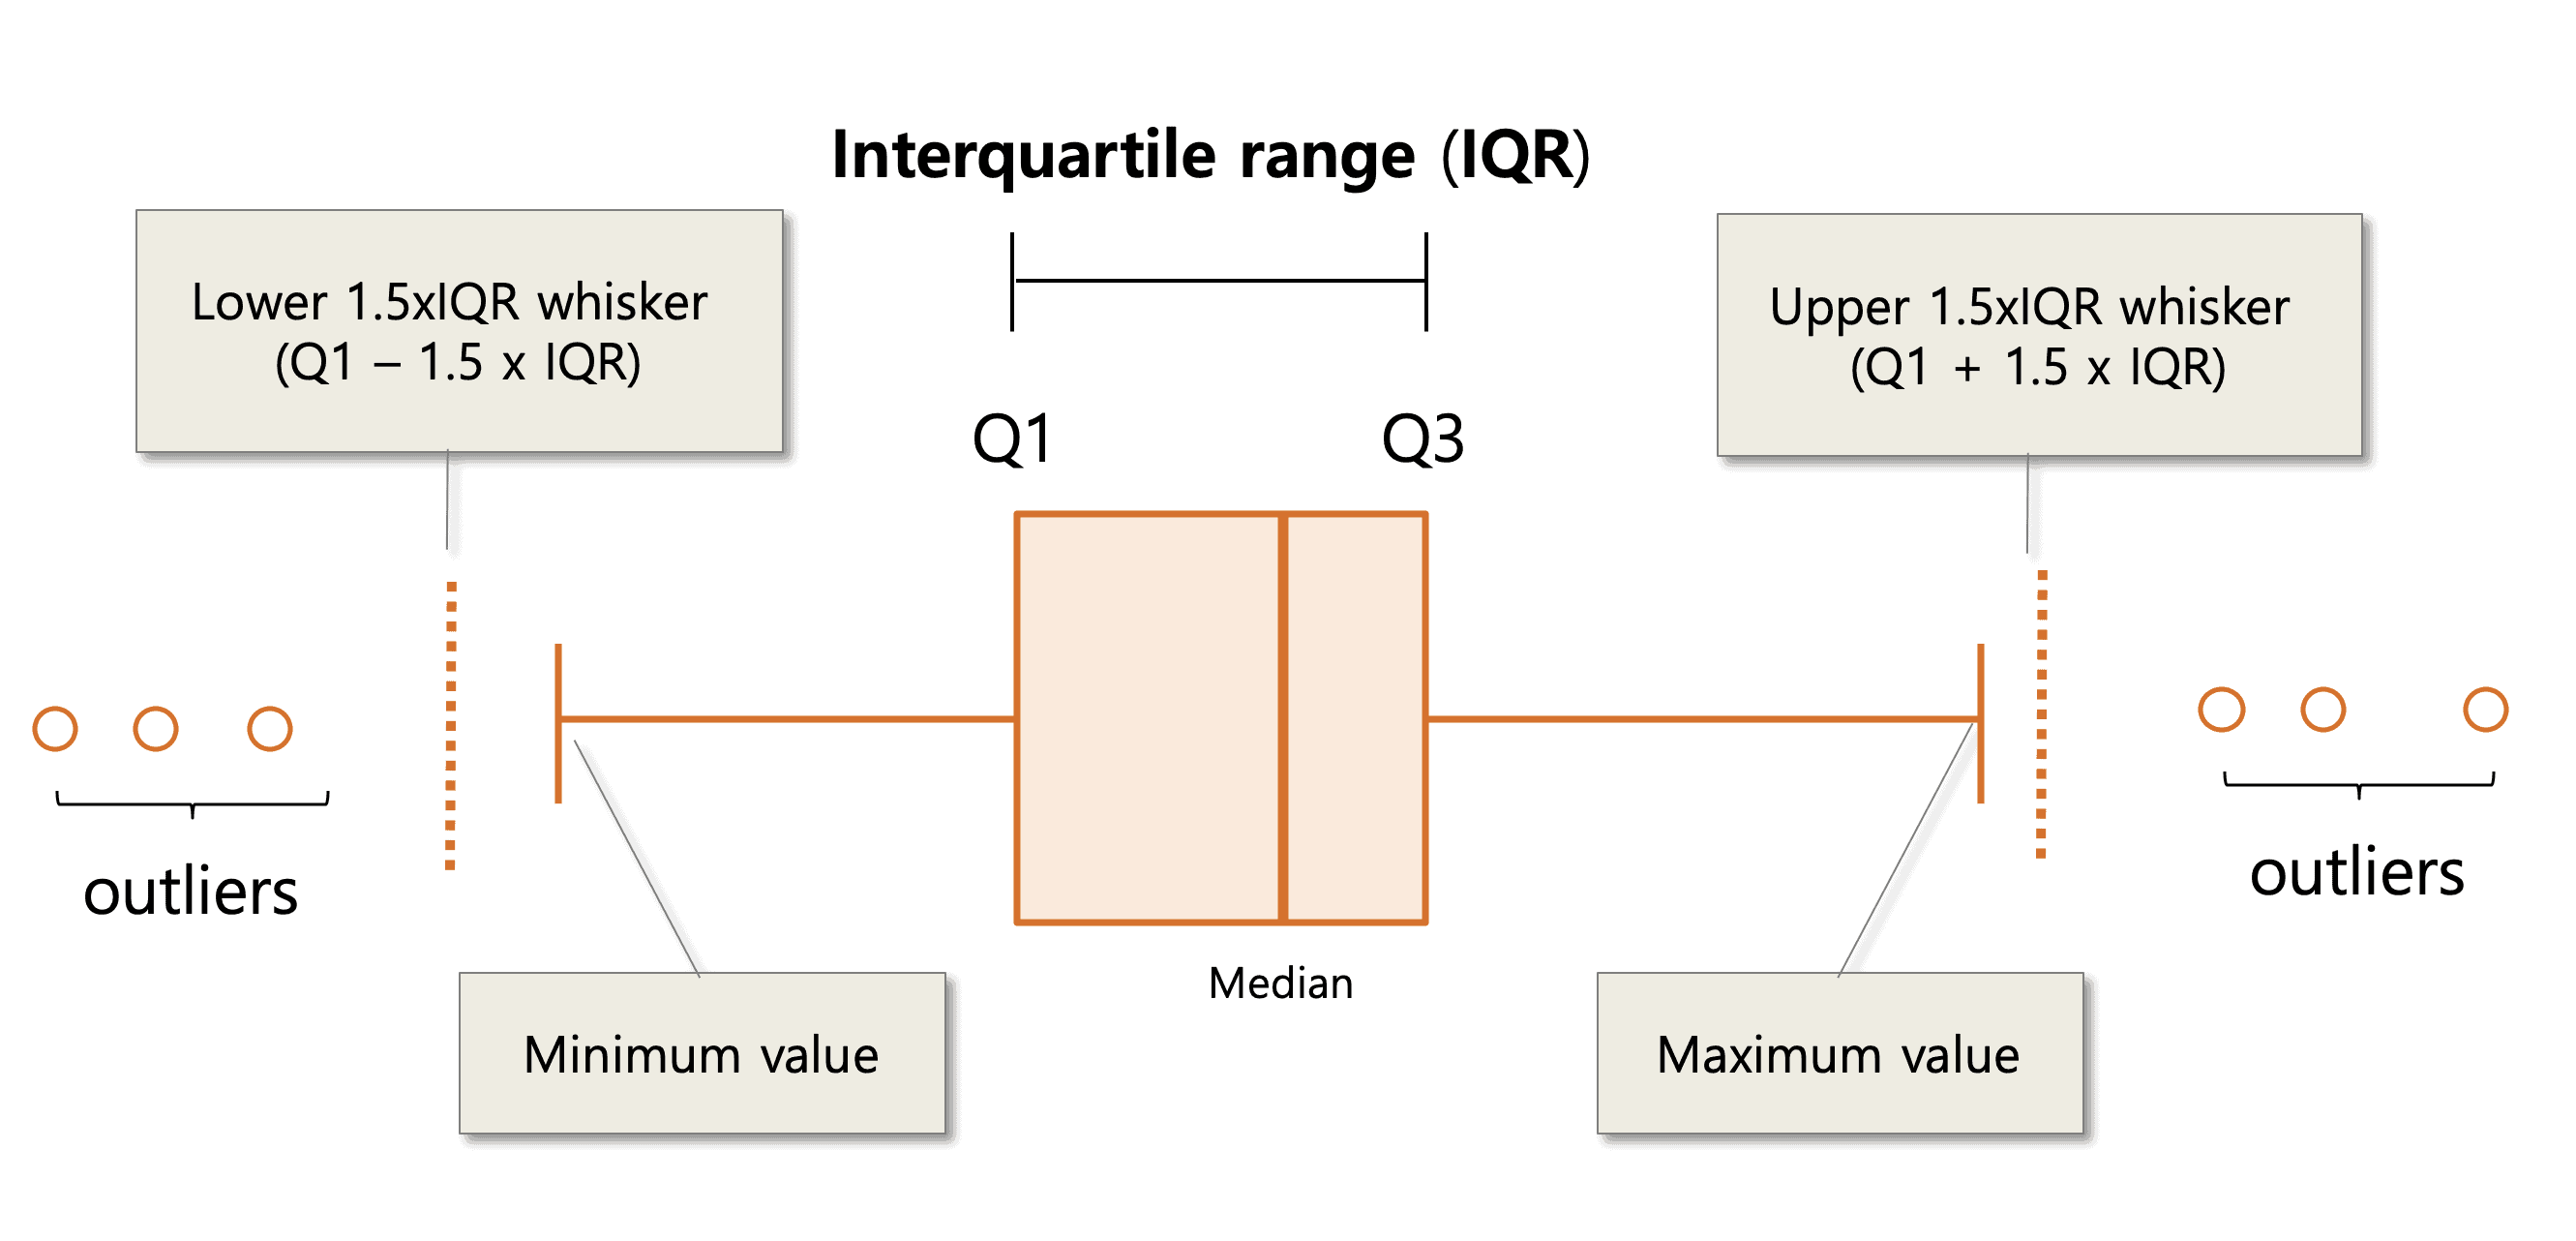

<Axes: >

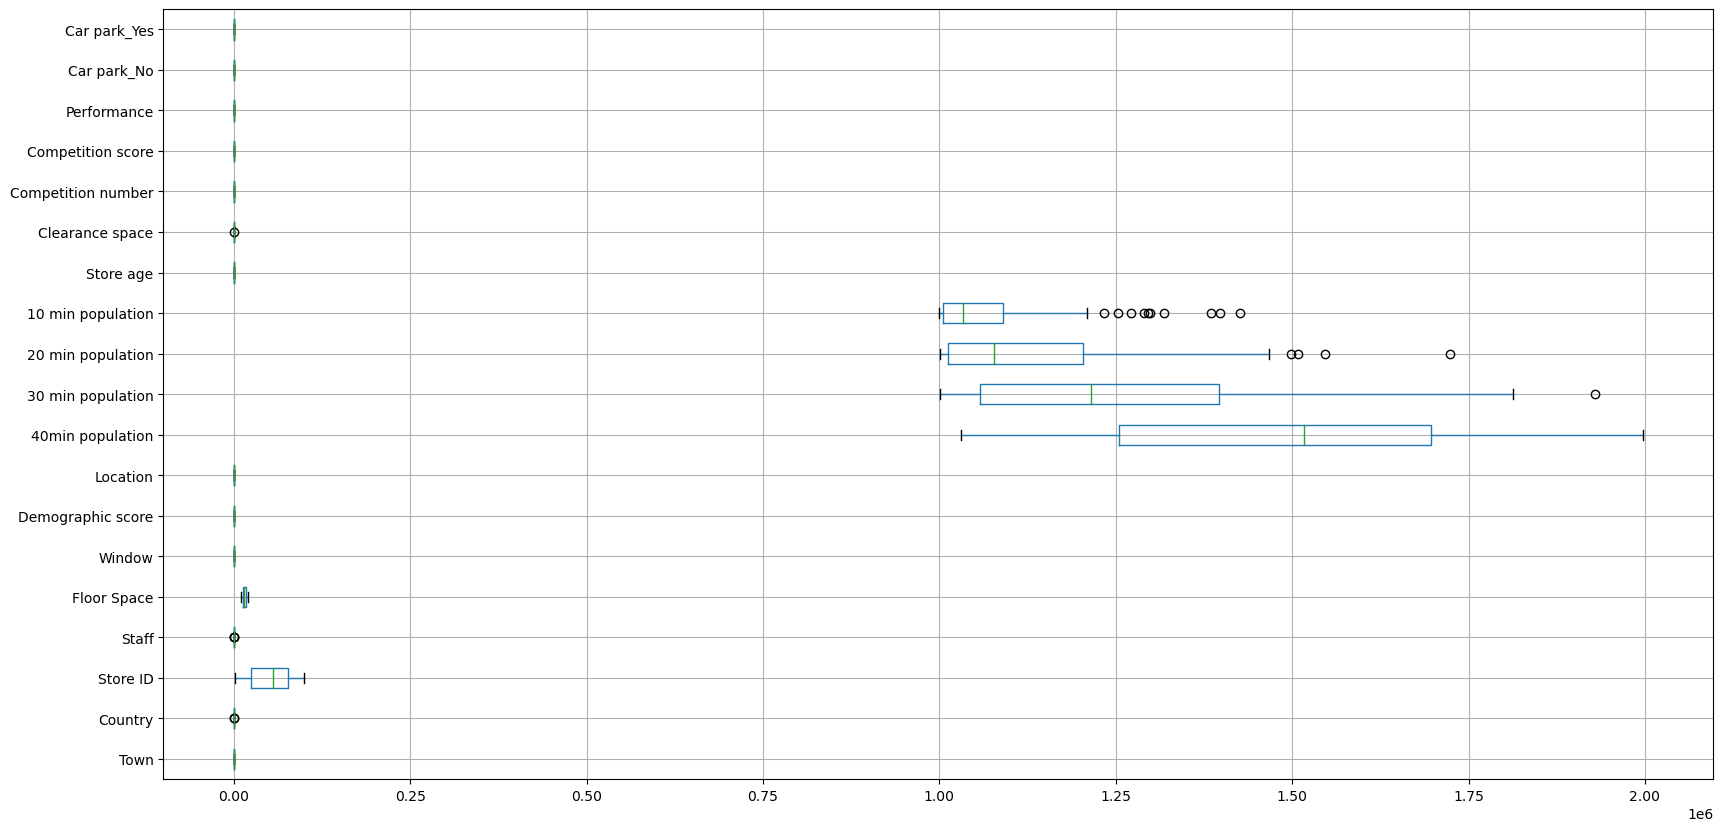

In [46]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)

<p>
Dapat dilihat pada kolom 10 min population, 20 min population, dan 30 min population terdapat outlier.
    
Beberapa cara yang dapat dilakukan untuk handling outlier adalah:

<ul>
    <li><b>Drop outlier</b>: Metode ini dapat dilakukan jika jumlah outlier yang ada di dataset terbilang sedikit. Namun metode ini berpotensi merusak pola dalam data dan mengurangi data training.</li>
    <li><b>Diganti dengan nilai konstan</b>: Metode ini juga dapat dilakukan jika jumlah outlier di dataset sedikit dan terjadi secara random. Namun, metode ini berpotensi mengabaikan korelasi atau pola dalam data dan bisa saja mengakibatkan bias dalam data</li>
    <li><b>Diganti dengan nilai mean, median, atau modus (imputasi)</b>: Metode ini memiliki kelebihan yaitu dapat mempertahankan central tendency dalam data. Namun juga dapat berpotensi untuk mengabaikan korelasi atau pola dalam data.</li>
    <li><b>Menggunakan winsorizer</b>: Winsorizing adalah cara menangani outlier dengan menetapkan outlier ke nilai suatu kuartil dari data. Sebagai contoh, 90% winsorization berarti semua nilai dalam kolom yang lebih tinggi dari 95% kuartil ke-3 akan disesuaikan ke nilai kuartil ke-3. Metode ini cocok dalam menghilangkan outlier dan menjaga keutuhan dataset, namun dapat menyebabkan distorsi data dan mengubah distribusi data asli dan membuat analisis lebih sulit atau tidak akurat.</li>
</ul>    

Dalam contoh disini, kita akan menggunakan fungsi Winsorizer untuk membuat cap pada kolom yang memiliki outlier.
</p>

In [47]:
from feature_engine.outliers import Winsorizer

windsorizer = Winsorizer(capping_method="iqr", tail='both',
fold=1.5, variables=['10 min population', '20 min population', '30 min population'])

In [48]:
windsorizer.fit(df)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['10 min population', '20 min population',
                      '30 min population'])

In [49]:
df = windsorizer.transform(df)

In [50]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,Car park_No,Car park_Yes
0,132,1,1437,Roger,9,18526,121,10,1,1288374,1138224.0,1006986.0,1002340,3,238,16,16.0,1,0.0,1.0
1,95,1,1544,Ella,8,18569,121,11,2,1086225,1015321.0,1012182.0,1008436,4,384,15,19.0,1,0.0,1.0
2,52,1,2039,Valentina,-2,12288,105,12,1,1595638,1281661.0,1104490.0,1011395,11,219,13,18.0,0,1.0,0.0
3,115,1,2055,Antonia,7,17092,117,14,2,1179395,1022959.0,1009496.0,1002169,5,261,15,12.0,0,1.0,0.0
4,32,1,2141,Gabriel,7,11307,103,18,1,1398558,1085170.0,1003137.0,1002513,7,200,19,13.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,96853,Vit�ria,7,14120,110,13,2,1665074,1240813.0,1141898.0,1041041,6,202,18,14.0,0,0.0,1.0
132,12,1,96858,Mat�as,6,11205,103,15,2,1657769,1424404.0,1378708.0,1160929,5,203,13,18.0,0,1.0,0.0
133,29,1,98062,Gustavo,7,16190,115,19,2,1407456,1359511.0,1200486.0,1063718,7,341,18,18.0,0,1.0,0.0
134,2,1,98923,Rafael,6,15516,113,17,0,1451087,1245725.0,1127276.0,1045154,11,261,14,10.0,0,1.0,0.0


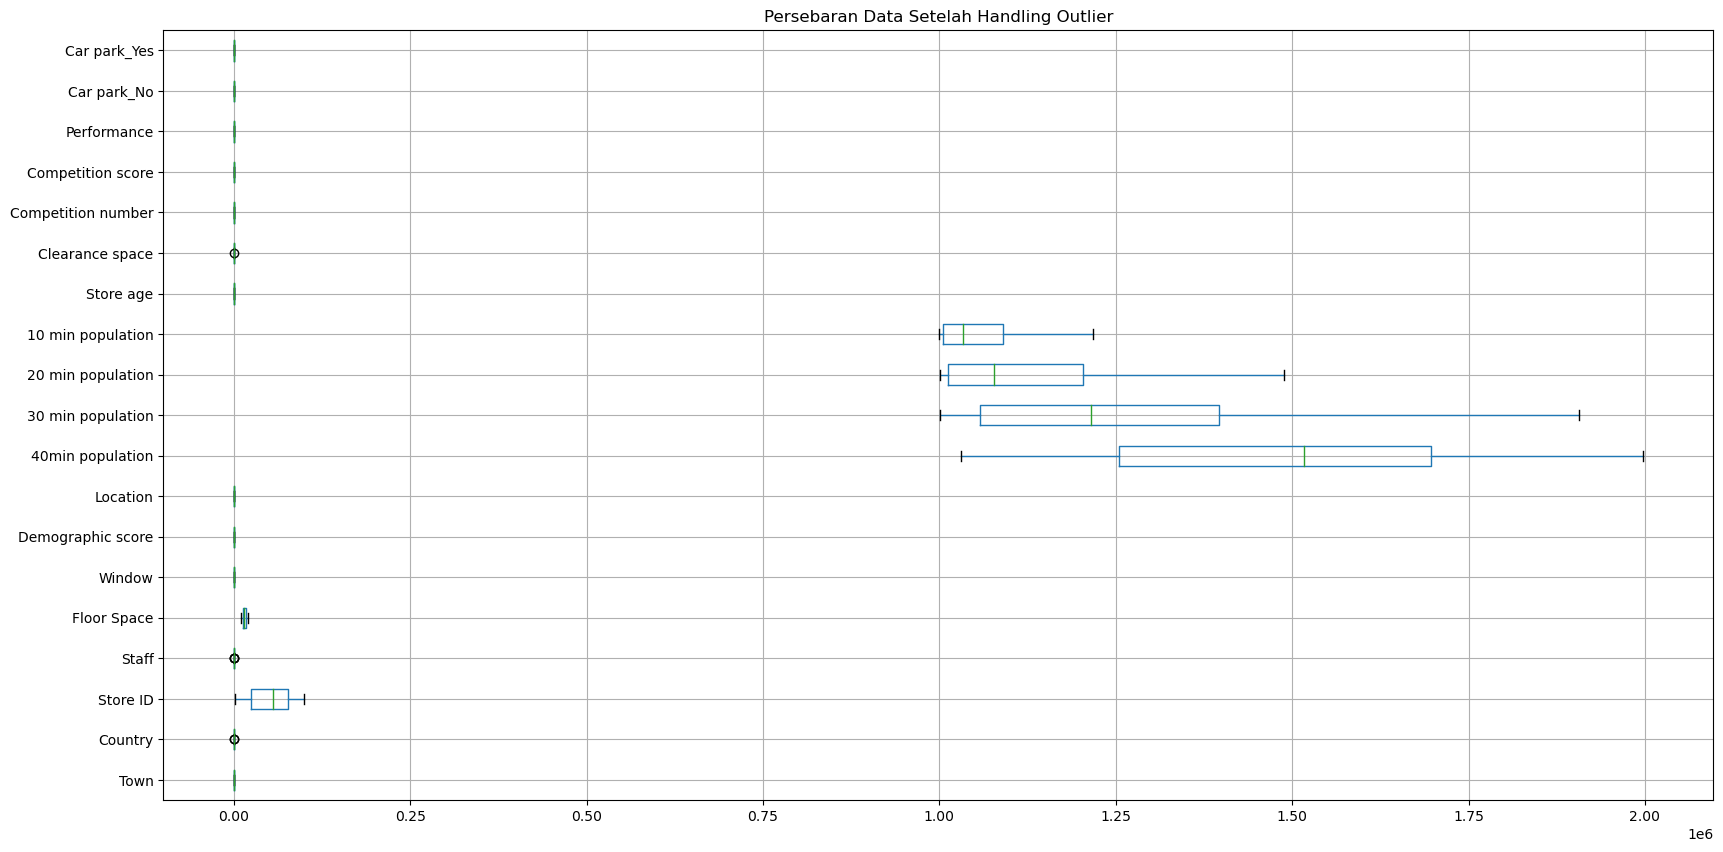

In [51]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)
plt.title("Persebaran Data Setelah Handling Outlier")
plt.show()

C:\Users\50272\AppData\Local\Temp\ipykernel_20216\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Town'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Store ID'}>,
        <Axes: title={'center': 'Staff'}>],
       [<Axes: title={'center': 'Floor Space'}>,
        <Axes: title={'center': 'Window'}>,
        <Axes: title={'center': 'Demographic score'}>,
        <Axes: title={'center': 'Location'}>],
       [<Axes: title={'center': '40min population'}>,
        <Axes: title={'center': '30 min population'}>,
        <Axes: title={'center': '20 min population'}>,
        <Axes: title={'center': '10 min population'}>],
       [<Axes: title={'center': 'Store age'}>,
        <Axes: title={'center': 'Clearance space'}>,
        <Axes: title={'center': 'Competition number'}>,
        <Axes: title={'center': 'Competition score'}>],
       [<Axes: title={'center': 'Performance'}>,
        <Axes: title={'center': 'Car park_No'}>,
        <Axes: title={'center': 'Car park_Yes'}>, <Axes: >]], dtype=object)

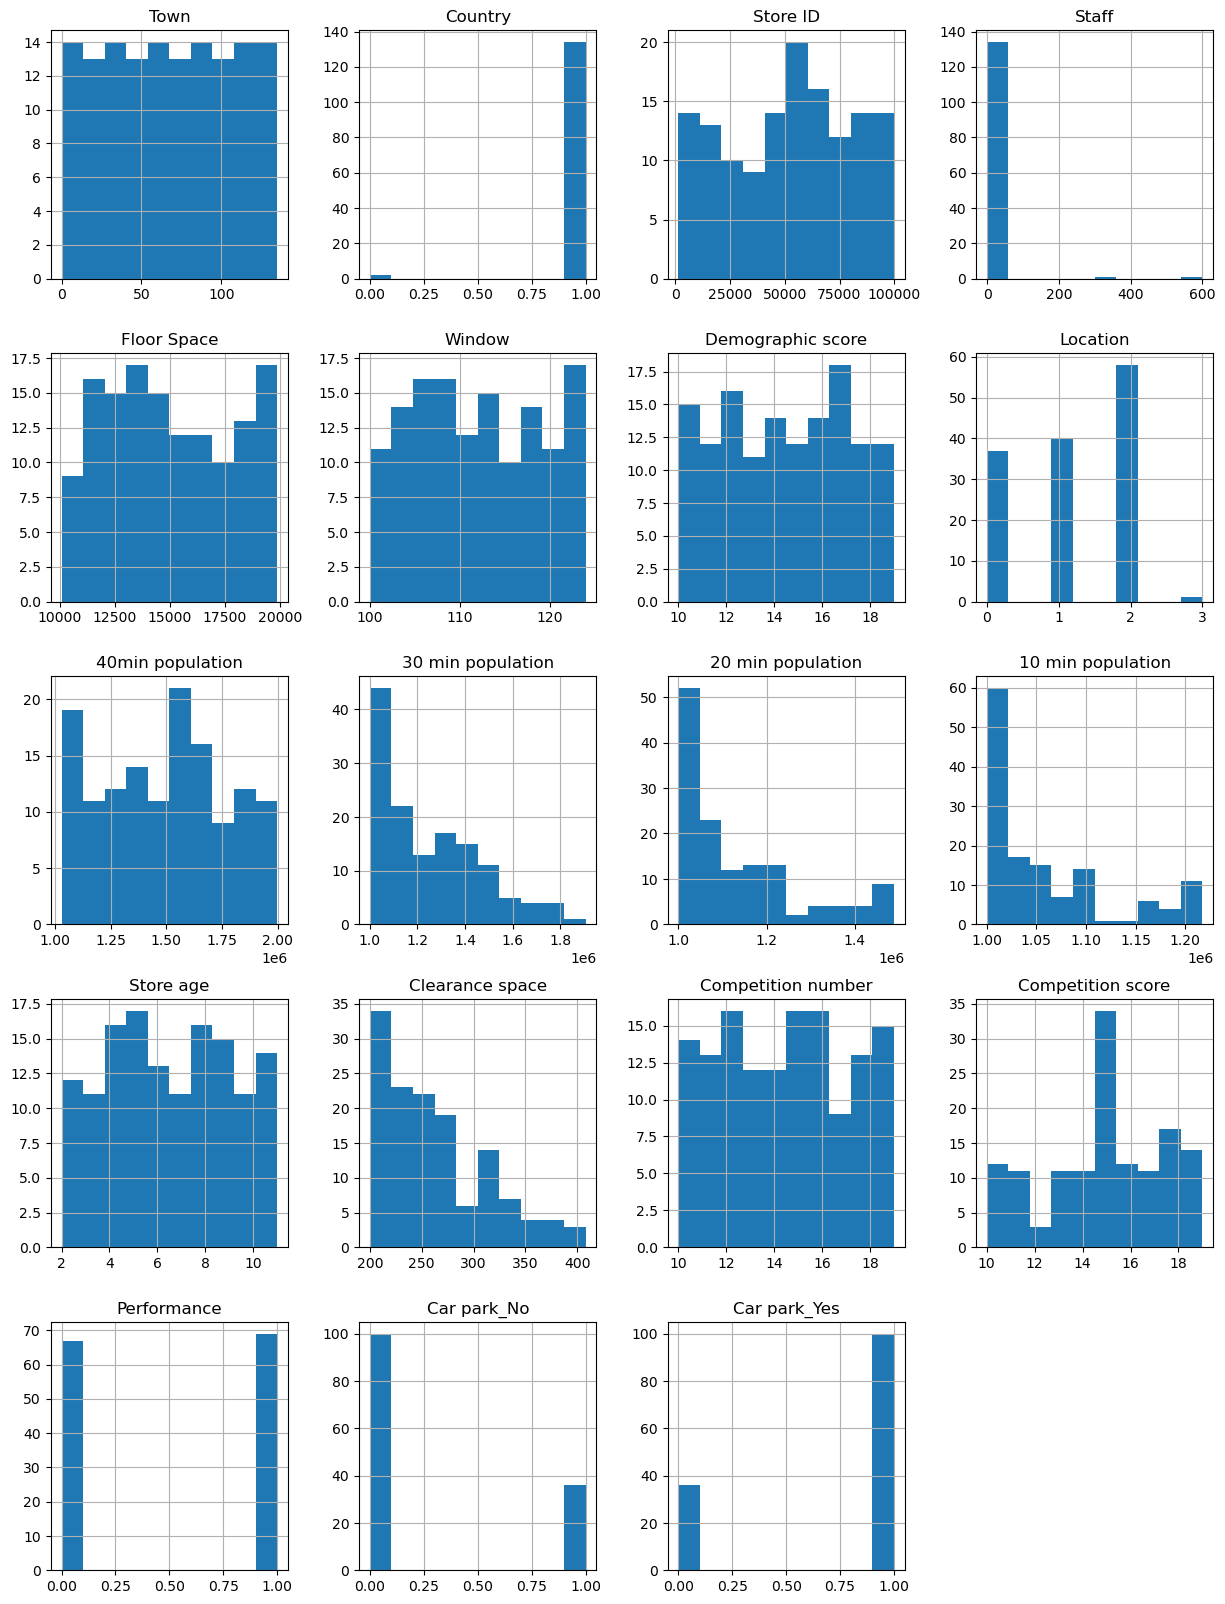

In [52]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<p>Sebelum melakukan normalisasi dan Feature Selection, kita akan melakukan splitting dataset menjadi dataset untuk training dan testing terlebih dahulu.</p>

In [53]:
from sklearn.model_selection import train_test_split

# Drop kolom manager name karena tidak punya korelasi yang signifikan
df.drop(columns='Manager name', inplace=True)

X = df.drop(columns=['Performance'])
y = df['Performance']

<h2>Normalization</h2>

<p>Dalam konteks data ilmiah dan analisis data, normalisasi mengacu pada proses mengubah nilai-nilai dari berbagai fitur dalam dataset ke skala umum, sehingga setiap fitur memiliki rentang nilai yang serupa. Normalisasi penting karena beberapa algoritma pembelajaran mesin memerlukan data yang telah dinormalisasi untuk bekerja secara efisien dan memberikan hasil yang akurat.

Tujuan normalisasi adalah untuk memastikan bahwa setiap fitur memiliki dampak yang seimbang pada analisis dan model yang sedang dibangun. Hal ini membantu mencegah fitur dengan rentang nilai yang besar mendominasi model, sementara fitur dengan rentang nilai yang lebih kecil diabaikan. Dengan normalisasi, algoritma pembelajaran mesin dapat belajar dari setiap fitur dengan cara yang seimbang, sehingga menghasilkan model yang lebih akurat dan andal.</p>

<h3>Jenis Normalisasi</h3>

<p><b>Min-Max Scaling</b><br> Ideal digunakan ketika Anda memiliki pemahaman yang jelas tentang rentang nilai maksimum dan minimum dari fitur Anda, dan Anda ingin menormalkan data ke rentang spesifik, misalnya 0 hingga 1. Metode ini cocok untuk data yang tidak memiliki distribusi normal atau ketika Anda ingin mempertahankan interpretasi asli dari data</p>

In [54]:
data = {'Feature1': [100, 200, 300, 400, 500],
        'Feature2': [10, 20, 30, 40, 50],
        'Feature3': [5, 10, 15, 20, 25]}

dummy_df = pd.DataFrame(data)

print("Dataframe asli: \n", dummy_df)

Dataframe asli: 
    Feature1  Feature2  Feature3
0       100        10         5
1       200        20        10
2       300        30        15
3       400        40        20
4       500        50        25


In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()  

df_scaled = scaler_minmax.fit_transform(dummy_df)
df_scaled = pd.DataFrame(df_scaled, columns=dummy_df.columns)

# Menampilkan DataFrame setelah scaling
print("DataFrame setelah Min-Max Scaling:")
print(df_scaled)

DataFrame setelah Min-Max Scaling:
   Feature1  Feature2  Feature3
0      0.00      0.00      0.00
1      0.25      0.25      0.25
2      0.50      0.50      0.50
3      0.75      0.75      0.75
4      1.00      1.00      1.00


<p><b>Z-Score Normalization</b><br> Cocok digunakan ketika Anda ingin memastikan bahwa data Anda memiliki rata-rata nol dan simpangan baku satu. Metode ini berguna ketika data Anda memiliki distribusi normal atau mendekati distribusi normal, dan Anda ingin menghilangkan perbedaan skala yang besar antara fitur-fitur yang berbeda. Z-Score Normalization juga cocok untuk penggunaan algoritma yang bergantung pada asumsi normalitas data.</p>

In [56]:
scaler = StandardScaler()

df_normalized = scaler.fit_transform(dummy_df)
df_normalized = pd.DataFrame(df_normalized, columns=dummy_df.columns)

# Menampilkan DataFrame setelah normalisasi
print("DataFrame setelah Z-Score Normalization:")
print(df_normalized)

DataFrame setelah Z-Score Normalization:
   Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


<p><b>Normalization by Decimal Scaling</b><br> Digunakan ketika Anda ingin melakukan normalisasi dengan menggeser koma desimal dari setiap nilai fitur, sehingga nilai-nilai tersebut jatuh dalam rentang tertentu, seperti antara -1 dan 1. Metode ini berguna ketika Anda ingin menjaga signifikansi angka dan mengurangi kompleksitas perhitungan. Normalization by Decimal Scaling cocok untuk kasus di mana interpretasi data sangat penting dan Anda ingin mempertahankan representasi numerik asli.</p>

In [57]:
# Mencari jumlah digit maksimal dalam kolom
max_digits = dummy_df.applymap(lambda x: len(str(x))).max()

# Menghitung skala
scale = 10 ** (max_digits - 1)

# Normalisasi by Decimal Scaling pada DataFrame
df_normalized = dummy_df / scale

# Menampilkan DataFrame setelah normalisasi
print("DataFrame setelah Normalization by Decimal Scaling:")
print(df_normalized)

DataFrame setelah Normalization by Decimal Scaling:
   Feature1  Feature2  Feature3
0       1.0       1.0       0.5
1       2.0       2.0       1.0
2       3.0       3.0       1.5
3       4.0       4.0       2.0
4       5.0       5.0       2.5


<h3>Bagaimana menentukan normalisasi yang tepat untuk data</h3>

<p>Langkah pertama yang dilakukan adalah melakukan pembentukan histogram. Berdasarkan visualisasi data, data dikatan terdistribusi normal apabila memenuhi poin-poin berikut.

<ul>
    <li><b>Simetri</b>: Distribusi normal simetris terhadap nilai tengahnya. Ini berarti bahwa bagian kanan distribusi mirip dengan bagian kirinya jika dilipat di tengah.</li>
    <li><b>Kurtosis</b>: Distribusi normal memiliki kurtosis (tingkat puncaknya) yang moderat, artinya tidak terlalu runcing atau datar. Puncaknya biasanya berbentuk lonceng.</li>
    <li><b>Skewness</b>: Distribusi normal memiliki skewness nol, yang berarti tidak ada kemiringan ke kanan atau kiri. Hal ini menunjukkan bahwa ekor distribusi di kedua sisi kurva normal cenderung simetris.</li>
    <li><b>Distribusi Persentil</b>: Dalam distribusi normal, nilai persentil akan mengikuti pola tertentu. Misalnya, 50% dari data akan berada di sekitar mean, 68% dari data akan berada dalam satu standar deviasi dari mean, dan 95% dari data akan berada dalam dua standar deviasi dari mean.</li>
    <li><b>Histogram</b>: Bentuk histogram distribusi normal menyerupai lonceng, dengan puncaknya di tengah dan ekornya yang menyebar ke kiri dan kanan.</li>
</ul>
</p>

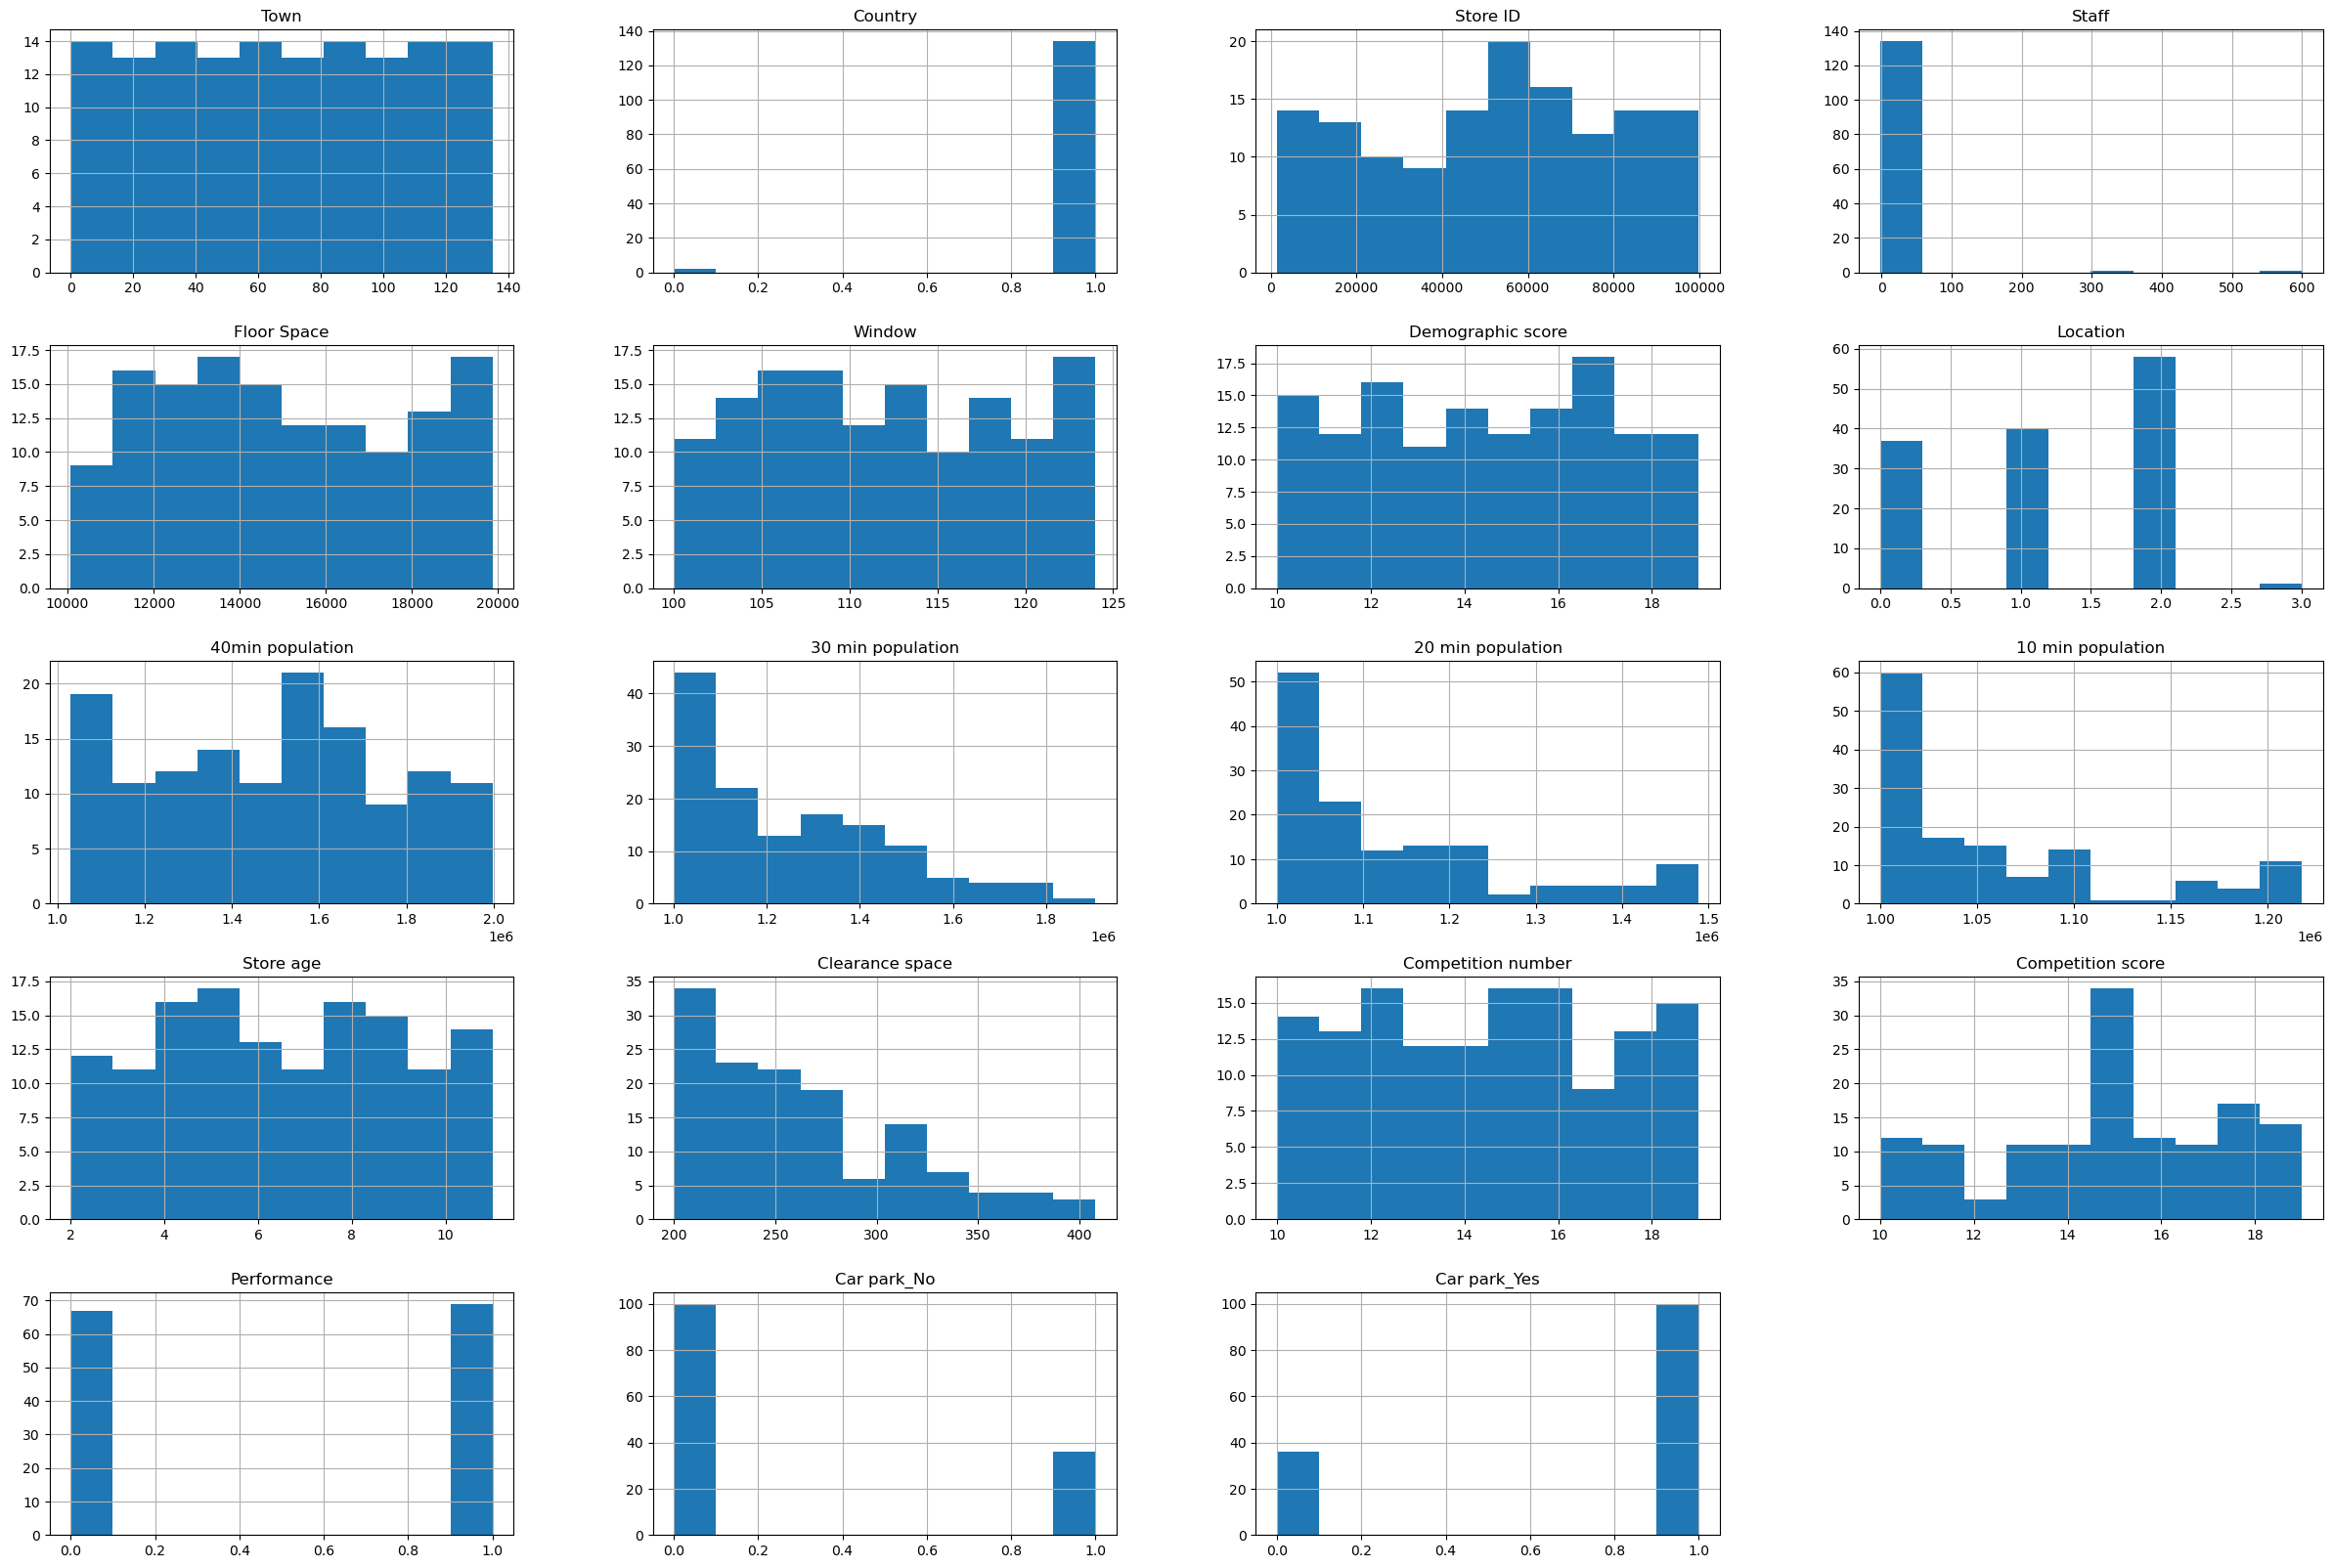

In [58]:
df.hist(figsize=(30, 20), bins=10)
plt.show()

Dapat disimpulkan bahwa distribusi sudah normal pada kebanyakan kolom pada data. Akan digunakan Z-Score Normalization untuk melakukan normalisasi.

In [59]:
# Split dataframe menjadi data testing dan training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

<h3>Principal Component Analysis</h3>

<p>PCA (Principal Component Analysis) adalah teknik reduksi dimensi yang digunakan untuk mengurangi kompleksitas dataset dengan memproyeksikan data dari ruang fitur yang tinggi ke ruang fitur yang lebih rendah. Tujuannya adalah untuk mempertahankan sebanyak mungkin informasi penting dalam data dengan menggunakan jumlah komponen yang lebih sedikit. 

Dengan menggunakan PCA, dimensi data dapat dikurangi dengan memilih sejumlah komponen utama yang paling penting, sementara sebagian besar variasi dalam data tetap dipertahankan. Dengan demikian, PCA dapat membantu mengatasi masalah dimensi tinggi, mempercepat waktu komputasi, dan mengurangi overfitting, sehingga meningkatkan performa model secara keseluruhan.
</p>

In [60]:
from sklearn.decomposition import PCA

n_components = 0.95

# Membuat objek PCA
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)

# Menampilkan hasil reduksi dimensi
print("Original Shape:", X.shape)
print("Reduced Shape:", X_pca.shape)

Original Shape: (136, 18)
Reduced Shape: (136, 3)


In [61]:
df_pca = pd.DataFrame(X_pca, columns=['Feature 1', 'Feature 2', 'Feature 3'])

In [62]:
df_pca

,Feature 1,Feature 2,Feature 3
0,-260175.450292,3923.875991,59612.089708
1,-479710.400681,-53359.626030,-7781.465182
2,85226.619396,69654.204474,51922.657968
3,-405790.635579,3898.949933,-3335.410686
4,-205811.442698,108714.224535,27561.089637
...,...,...,...
131,132301.054002,118592.517062,-16127.863961
132,316640.798740,-120771.497222,-128319.913372
133,20840.822717,-148299.695414,10806.160721
134,-33070.640546,-16045.904008,5286.979013


<h2> Feature Selection </h2>

<p>Feature selection adalah proses yang memilih subset fitur dari fitur keseluruhan sehingga fitur yang digunakan untuk melatih model dikurangi secara optimal sesuai dengan kriteria tertentu. Salah satu cara untuk melakukan Feature Selection adalah dengan metode RFE.</p>

<p>RFE atau Recursive Feature Elimination adalah salah satu metode dalam feature selection yang digunakan untuk memilih fitur yang paling penting dari dataset. Metode ini bekerja dengan cara mengeliminasi fitur secara bertahap berdasarkan kontribusinya terhadap model yang sedang dipelajari.</p>

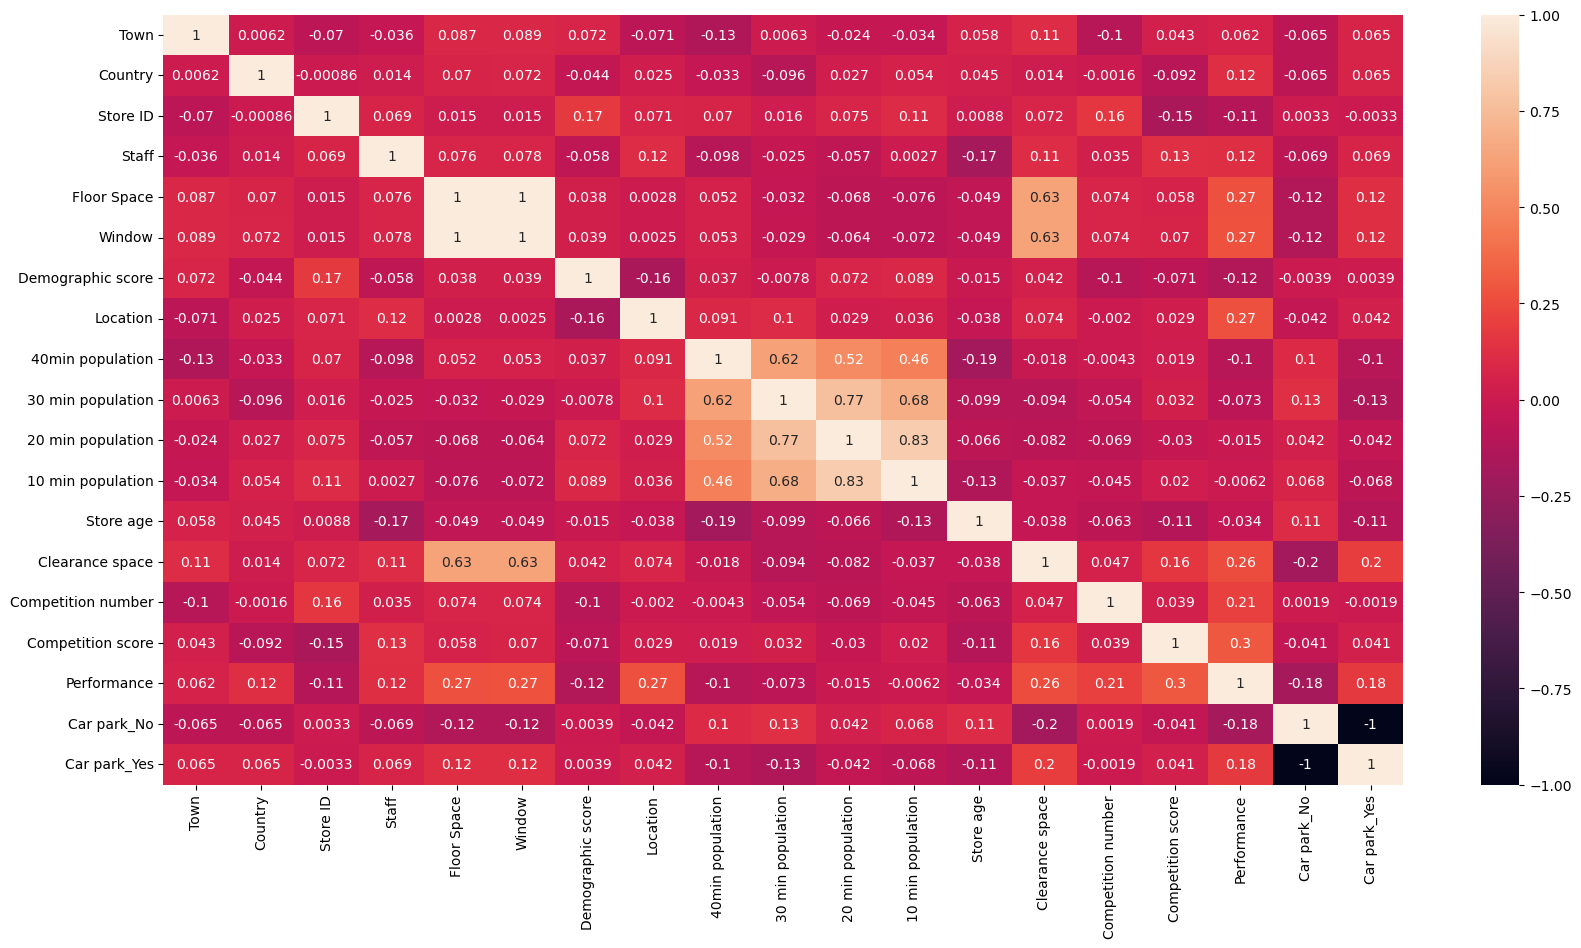

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(method="pearson"), annot=True, ax=ax)

plt.show()

<h3>Apa itu Cross Validation?</h3>
<p>
Cross Validation adalah metode untuk mengevaluasi kinerja model pada data yang belum diketahui oleh model. Teknik ini melibatkan pembagian data yang tersedia ke dalam beberapa fold atau subset, menggunakan salah satu dari fold ini sebagai set validasi, dan melatih model pada fold yang tersisa. Proses ini diulangi beberapa kali, setiap kali menggunakan fold yang berbeda sebagai set validasi. Terakhir, hasil dari setiap langkah validasi dirata-ratakan untuk menghasilkan estimasi yang lebih kuat dari kinerja model. Metode Cross Validation yang digunakan pada contoh ini adalah Stratified K-Fold. Cara kerja Stratified K-Fold dapat dilihat pada ilustrasi di bawah ini.
</p>

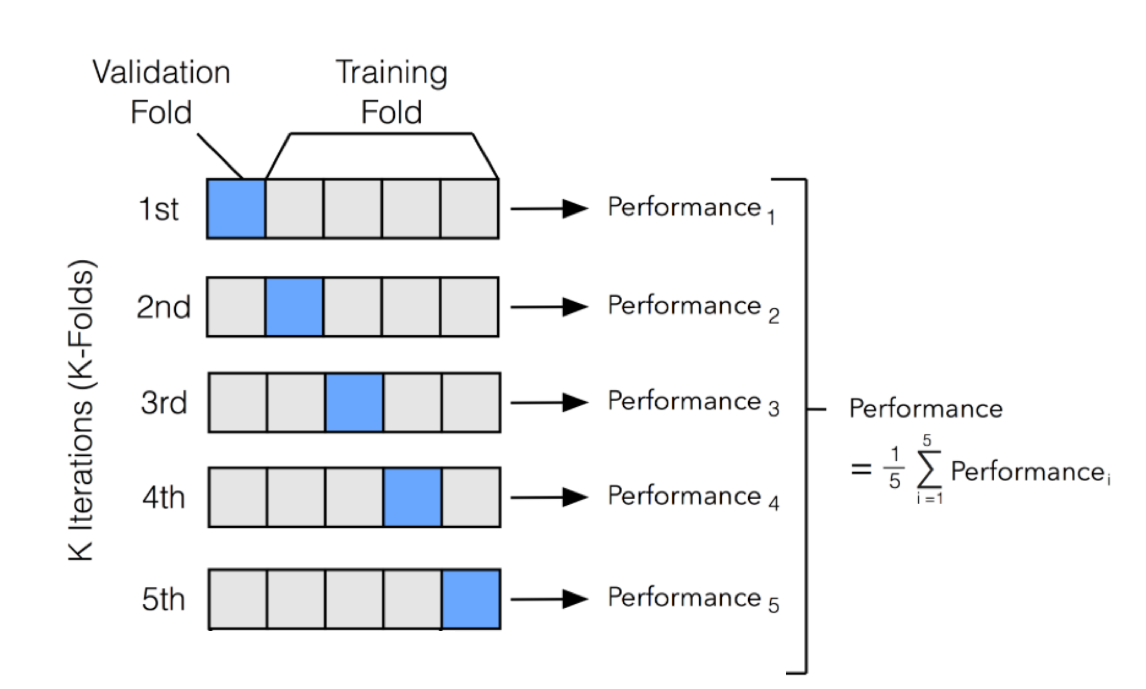

In [64]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

min_features_to_select = 1  # Minimum number of features to consider
clf = RandomForestClassifier(n_estimators=500, random_state=42)
cv = StratifiedKFold(n_splits = 5, shuffle=False)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features are {X.columns[rfecv.support_]}")

Optimal number of features: 15
Selected features are Index(['Town', 'Store ID', 'Staff', 'Floor Space', 'Window',
       'Demographic score', 'Location', '40min population',
       '30 min population', '20 min population', '10 min population',
       'Store age', 'Clearance space', 'Competition number',
       'Competition score'],
      dtype='object')


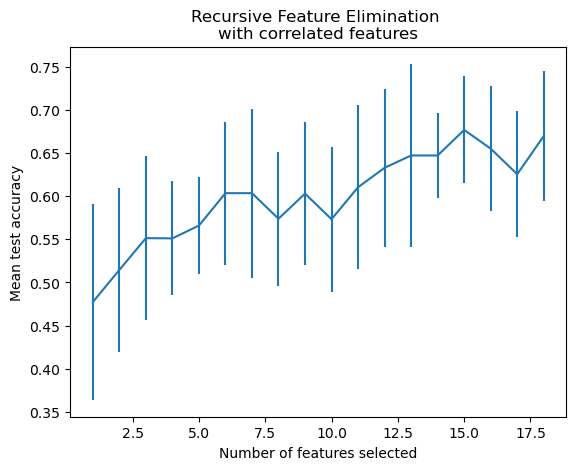

In [65]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [66]:
X

,Town,Country,Store ID,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Car park_No,Car park_Yes
0,132,1,1437,9,18526,121,10,1,1288374,1138224.0,1006986.0,1002340,3,238,16,16.0,0.0,1.0
1,95,1,1544,8,18569,121,11,2,1086225,1015321.0,1012182.0,1008436,4,384,15,19.0,0.0,1.0
2,52,1,2039,-2,12288,105,12,1,1595638,1281661.0,1104490.0,1011395,11,219,13,18.0,1.0,0.0
3,115,1,2055,7,17092,117,14,2,1179395,1022959.0,1009496.0,1002169,5,261,15,12.0,1.0,0.0
4,32,1,2141,7,11307,103,18,1,1398558,1085170.0,1003137.0,1002513,7,200,19,13.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,96853,7,14120,110,13,2,1665074,1240813.0,1141898.0,1041041,6,202,18,14.0,0.0,1.0
132,12,1,96858,6,11205,103,15,2,1657769,1424404.0,1378708.0,1160929,5,203,13,18.0,1.0,0.0
133,29,1,98062,7,16190,115,19,2,1407456,1359511.0,1200486.0,1063718,7,341,18,18.0,1.0,0.0
134,2,1,98923,6,15516,113,17,0,1451087,1245725.0,1127276.0,1045154,11,261,14,10.0,1.0,0.0


In [67]:
# Ambil fitur yang dipilih di RFE
X = X[['Town', 'Store ID', 'Staff', 'Floor Space', 'Window',
       'Demographic score', 'Location', '40min population',
       '30 min population', '20 min population', '10 min population',
       'Store age', 'Clearance space', 'Competition number',
       'Competition score']]

In [68]:
X

,Town,Store ID,Staff,Floor Space,Window,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
0,132,1437,9,18526,121,10,1,1288374,1138224.0,1006986.0,1002340,3,238,16,16.0
1,95,1544,8,18569,121,11,2,1086225,1015321.0,1012182.0,1008436,4,384,15,19.0
2,52,2039,-2,12288,105,12,1,1595638,1281661.0,1104490.0,1011395,11,219,13,18.0
3,115,2055,7,17092,117,14,2,1179395,1022959.0,1009496.0,1002169,5,261,15,12.0
4,32,2141,7,11307,103,18,1,1398558,1085170.0,1003137.0,1002513,7,200,19,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,96853,7,14120,110,13,2,1665074,1240813.0,1141898.0,1041041,6,202,18,14.0
132,12,96858,6,11205,103,15,2,1657769,1424404.0,1378708.0,1160929,5,203,13,18.0
133,29,98062,7,16190,115,19,2,1407456,1359511.0,1200486.0,1063718,7,341,18,18.0
134,2,98923,6,15516,113,17,0,1451087,1245725.0,1127276.0,1045154,11,261,14,10.0


<h1>Supervised Learning</h1>

<p>
Supervised learning adalah salah satu bidang machine learning di mana model belajar dari data pelatihan berlabel. Selama training, pengguna memberikan data input kepada algoritma serta label output yang terkait. Berdasarkan data input, algoritma mempelajari pemetaan dari input ke output dan menghasilkan prediksi atau penilaian. Ada banyak penerapan yang menggunakan supervised learning, termasuk penyaringan spam, pengenalan suara, penerjemahan mesin, dan periklanan online.
</p>

![supervised_desc.png](./images/supervised_desc.png)

<h2>Regresi</h2>

Regresi adalah salah satu jenis metode Supervised Learning di mana variabel targetnya berupa nilai yang bersifat kontinu. Contoh penggunaannya termasuk memprediksi berat badan, usia, harga, dan sebagainya. Beberapa jenis regresi yang akan kita bahas nantinya adalah: 

<ul>
    <li><b>Simple Linear Regression</b></li>
    <li><b>Non-Linear Regression</b></li>
    <li><b>Multiple Regression</b></li>
</ul>


![regression_desc-2.png](./images/regresi_desc.png)

<h2>Simple Linear Regression</h2>
    <p>Simple Regression adalah metode statistik yang memperkirakan hubungan antara satu variabel dependen dan satu variabel independen. Ini adalah jenis model regresi yang digunakan untuk menggambarkan hubungan antara dua variabel kuantitatif. Simple Regression juga dikenal sebagai simple linear regression, karena melibatkan pencocokan garis lurus dengan data yang diamati.</p>
    <ul>
        <li><b>Variabel Dependen</b></li>
            <p>Variabel dependenadalah input dalam model supervised learning. Variabel-variabel ini adalah variabel yang        dimanipulasi untuk mengamati efeknya terhadap variabel dependen.

Contoh: Bayangkan Anda sedang membuat kue. Jumlah gula yang Anda masukkan adalah variabel independen - itulah yang dapat Anda ubah untuk membuat kue lebih manis atau kurang manis.
    </p>
    <br>
        <li><b>Variabel Independen</b></li>
        <p>
             Variabel independen adalah output dari model. Variabel ini adalah variabel yang ingin kita prediksi atau pahami.
            <br><br>
             Contoh: Rasa manis dari kue adalah variabel dependen. Tergantung pada jumlah gula yang ditambahkan.
        </p>
    <ul/>
    


<h3>Rumus</h3>

![simple_reg.png](./images/simple_reg.png)

>- y = nilai prediksi variabel dependen (y) untuk setiap nilai variabel independen (x) yang diberikan.  
>- $\beta_{0}$ = intercept, nilai prediksi y ketika x = 0.  
>- $\beta_{1}$ = koefisien regresi, seberapa besar kita mengharapkan y berubah ketika x meningkat.  
>- x = variabel independen (variabel yang kita harapkan mempengaruhi y).  
>- $\epsilon$ = kesalahan estimasi, atau seberapa besar variasi yang ada dalam estimasi kita terhadap koefisien regresi.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
income_data = pd.read_csv('./data/income.data.csv')

In [3]:
income_data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = income_data['income']  # Independent variable
y = income_data['happiness']  # Dependent variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
reg = LinearRegression()

X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

reg.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rsquared = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', rsquared)
print('RMSE:', rmse)

MAE: 0.5928474195973893
MSE: 0.5514895183944514
R-squared: 0.7401256340340991
RMSE: 0.7426234028055212


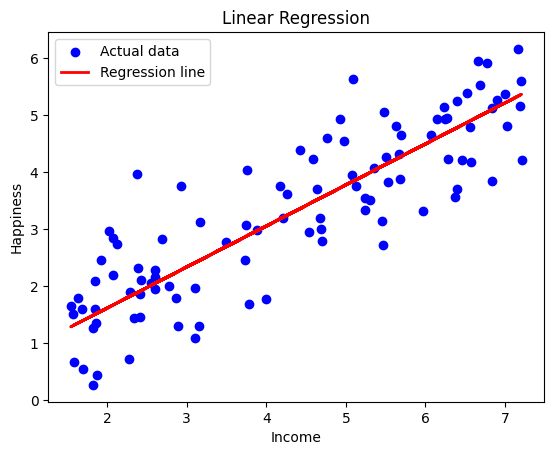

In [8]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plotting the regression line
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=2, label='Regression line')

plt.title('Linear Regression')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.legend()
plt.show()

<h2>Multiple Regression</h2>

Multiple regression adalah teknik statistik yang memperkirakan hubungan antara variabel dependen dan dua atau lebih variabel independen. Metode ini merupakan lanjutan dari Simple Regression, yang hanya melibatkan satu variabel independen. Multiple regression juga dikenal sebagai multiple linear regression (MLR).

<h3>Rumus</h3>


![multiple_reg.png](./images/multiple_reg.png)

>$y$ = nilai prediksi dari variabel dependen
>
>$\beta_{0}$ = intersep y (nilai y ketika semua parameter lain ditetapkan ke 0)
>
>$\beta_{1}X_{1}$ = koefisien regresi (B1) dari variabel independen pertama (X1) (alias efek peningkatan nilai variabel independen terhadap nilai y yang diprediksi)
>
>$\beta_{n}X_{n}$ = koefisien regresi dari variabel independen terakhir
>
>$\epsilon$ = kesalahan model (alias berapa banyak variasi yang ada dalam perkiraan kita tentang y)


Analisis ini memungkinkan kita untuk menilai seberapa baik kombinasi variabel bebas dapat memprediksi nilai variabel terikat dan seberapa signifikan masing-masing variabel bebas dalam membuat prediksi tersebut. Hal ini dilakukan dengan menghitung koefisien regresi yang meminimalkan kesalahan model, menggunakan statistik t untuk menilai keandalan model secara keseluruhan, dan nilai p untuk mengukur probabilitas bahwa hubungan yang diamati terjadi secara kebetulan.

Sebagai contoh praktis, dalam kasus restoran, multiple regression dapat digunakan untuk menentukan bagaimana faktor-faktor seperti kualitas makanan, layanan, dan dekorasi mempengaruhi harga makanan. Dengan demikian, kita dapat memahami variabel mana yang paling mempengaruhi pembentukan harga dan seberapa kuat pengaruhnya.

In [9]:
import statsmodels.api as sm

heart_data = pd.read_csv('./data/heart.data.csv')

In [10]:
# Menentukan Variabel
X = heart_data[['biking', 'smoking']]  # Independent variables
y = heart_data['heart.disease']  # Dependent variable

# Menentukan starting point y bila x=0
X = sm.add_constant(X)

# Fit the multiple linear model
model = sm.OLS(y, X).fit()

In [11]:
# View the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          heart.disease   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:52:06   Log-Likelihood:                -493.68
No. Observations:                 498   AIC:                             993.4
Df Residuals:                     495   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9847      0.080    186.988      0.0

In [12]:
# Hitung min max mean
min_smoking = heart_data['smoking'].min()
mean_smoking = heart_data['smoking'].mean()
max_smoking = heart_data['smoking'].max()

# Cetak value
print(f"Minimum smoking rate: {min_smoking}")
print(f"Mean smoking rate: {mean_smoking}")
print(f"Maximum smoking rate: {max_smoking}")

Minimum smoking rate: 0.525849992525764
Mean smoking rate: 15.435034414451994
Maximum smoking rate: 29.946743110544


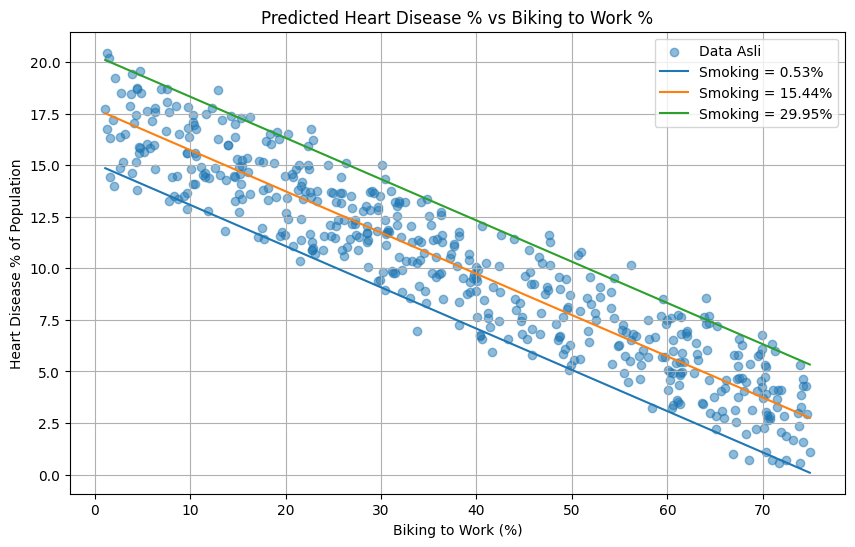

In [13]:
# Tentukan rentang value bersepeda untuk sumbu x
biking_percentages = np.linspace(heart_data['biking'].min(), heart_data['biking'].max(), 100)

# Buat gambar dan sumbu
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot untuk data asli
ax.scatter(heart_data['biking'], heart_data['heart.disease'], alpha=0.5, label='Data Asli')

# Gambarkan garis untuk setiap value merokok
for smoking_percentage in [0.53, 15.44, 29.95]:
    # Buat DataFrame dengan value bersepeda dan value merokok yang konstan
    input_data = pd.DataFrame({'const': 1, 'biking': biking_percentages, 'smoking': smoking_percentage})
    # Pastikan kolom-kolom dalam urutan yang benar
    input_data = input_data[['const', 'biking', 'smoking']]
    # Dapatkan value penyakit jantung yang diprediksi
    predicted_heart_disease = model.predict(input_data)
    ax.plot(biking_percentages, predicted_heart_disease, label=f'Smoking = {smoking_percentage}%')

# Beri label pada sumbu dan tambahkan legenda
ax.set_xlabel('Biking to Work (%)')
ax.set_ylabel('Heart Disease % of Population')
ax.legend()
ax.grid(True)
ax.set_title('Predicted Heart Disease % vs Biking to Work %')

# Tampilkan plot
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get the predicted values
predicted_values = model.predict(X)

# Evaluation Metrics
r_squared = model.rsquared
print(f'R-squared: {r_squared:.2f}')

mae = mean_absolute_error(y, predicted_values)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y, predicted_values)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.98
Mean Absolute Error: 0.52
Mean Squared Error: 0.43
Root Mean Squared Error: 0.65


<h2>Non Linear Regression</h2>

Nonlinear regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen dengan satu atau lebih variabel independen ketika hubungan tersebut tidak linier. Dengan kata lain, metode ini digunakan untuk menyesuaikan kurva dengan data ketika hubungan antara variabel tidak berbentuk garis lurus.

Model regresi nonlinier dapat memiliki banyak bentuk, termasuk di antaranya adalah fungsi polinomial, eksponensial, dan logaritmik. Pilihan model tergantung pada sifat data dan pertanyaan penelitian yang diajukan. Model nonlinear regression diperkirakan menggunakan algoritma berulang yang meminimalkan perbedaan antara data yang diamati dan nilai prediksi dari model.

In [15]:
gdp_data = pd.read_csv('./data/china_gdp.csv')

gdp_data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


<h3>Plotting Data</h3>

<p>Seperti inilah tampilan data poin. Terlihat seperti fungsi logistik atau eksponensial. Pertumbuhannya dimulai dengan lambat, kemudian dari tahun 2005 dan seterusnya, pertumbuhannya sangat signifikan. Dan akhirnya, pertumbuhannya sedikit melambat di tahun 2010-an.</p>

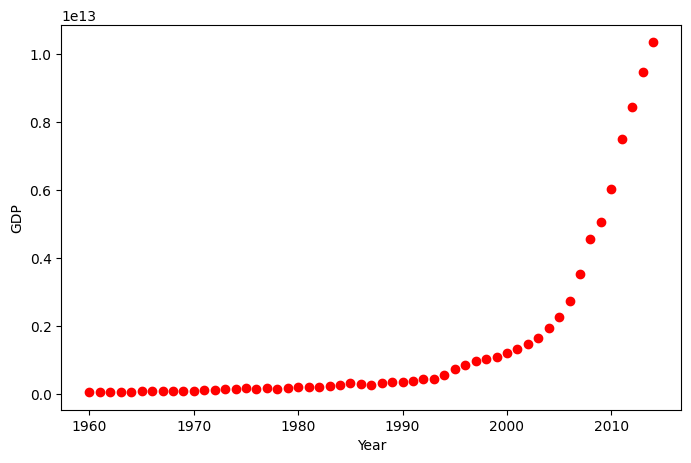

In [16]:
plt.figure(figsize=(8,5))
x_data, y_data = (gdp_data["Year"].values, gdp_data["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

**Memilih model**

Dari pengamatan awal pada plot, kita menentukan bahwa fungsi logistik dapat menjadi perkiraan yang baik, karena fungsi ini memiliki sifat dimulai dengan pertumbuhan yang lambat, pertumbuhan yang meningkat di tengah, dan kemudian menurun lagi di bagian akhir; seperti yang diilustrasikan di bawah ini:

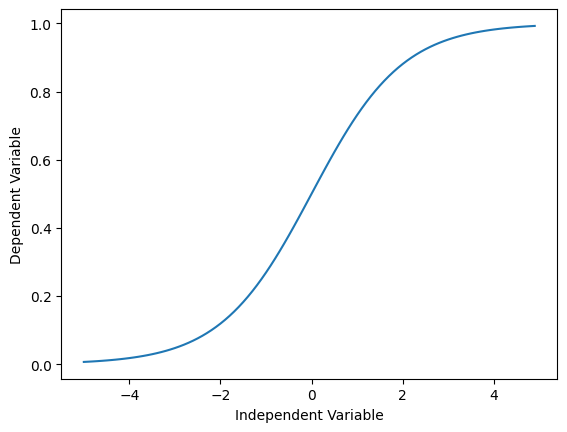

In [17]:
X = np.arange(-5, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

`X = np.arange(-5,5.0, 0.1)`: Langkah ini membuat array `X` menggunakan fungsi `arange` dari NumPy, yang menghasilkan nilai dari -5 sampai di bawah 5 (karena nilai berhenti bersifat eksklusif) dengan step 0,1. Array ini akan berfungsi sebagai "variabel independen" untuk plot fungsi sigmoid.

`Y = 1.0 / (1.0 + np.exp(-X))`: Di sini kita menghitung fungsi sigmoid. `np.exp(-X)` menghitung eksponensial dari `-X` untuk setiap elemen dalam array `X`. Hasilnya kemudian digunakan dalam rumus fungsi sigmoid untuk mendapatkan nilai `Y` yang sesuai, yang berfungsi sebagai "variabel dependen".

<h3> Pembuatan Model </h3>

In [18]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Fungsi sigmoid yang didefinisikan di sini mewakili kurva sigmoid parametrik, yang merupakan jenis fungsi logistik. Fungsi ini sering digunakan dalam regresi logistik dan neural network karena fungsi ini dapat memetakan nilai input apa pun ke rentang antara 0 dan 1, sehingga sangat berguna untuk memodelkan distribusi probabilitas dan klasifikasi biner.


`y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2))))`

Di dalam fungsi tersebut, variabel y dihitung sebagai nilai fungsi

*   sigmoid pada x dengan parameter yang diberikan Beta_1 dan Beta_2.
np.exp adalah fungsi eksponensial e^x, yang merupakan fungsi matematika dasar yang sering digunakan dalam representasi alami dari proses pertumbuhan atau penyusutan.

*   Ekspresi `-Beta_1*(x-Beta_2)` menskalakan dan menggeser input x. Ketika Beta_1 positif, fungsi ini akan menghasilkan kurva berbentuk S standar; ketika Beta_1 negatif, kurva dibalik secara horizontal.

*   `1 + np.exp(-Beta_1*(x-Beta_2))` menggeser fungsi eksponensial secara vertikal sebesar 1 untuk memastikan output berkisar antara 0 dan 1.

<h3> Scale value untuk representasi GDP aktual </h3>

<p>
Hal ini dikarenakan output dari fungsi sigmoid berkisar antara 0 dan 1, dan kita perlu menskalakannya ke nilai PDB aktual untuk membuat perbandingan yang berarti. Garis yang diplot menunjukkan prediksi GDP menurut model dengan tebakan parameter awal. Mari kita lihat contoh sigmoid line yang mungkin sesuai dengan data:

<ul>
    <li>beta_1: Angka ini menunjukkan seberapa curam kurva Anda.</li>
    <li>beta_2: Angka ini memberi tahu Anda di mana tikungan tengah/mid point kurva pada sumbu X (tahun).</li>
</ul>
</p>

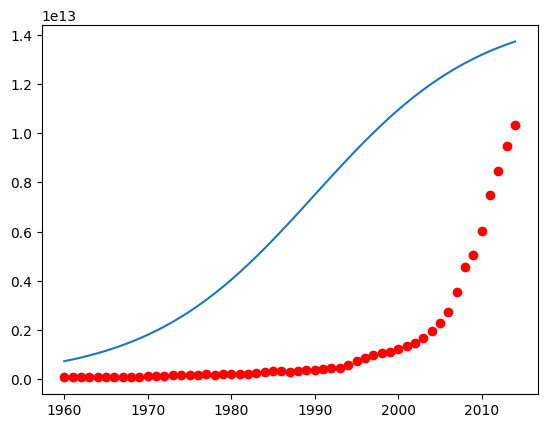

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

<h3>Optimalisasi parameter</h3>

In [20]:
# Normalisasi Data
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

<h5>Bagaimana cara menemukan parameter yang optimal?</h5>
<p>
Kita dapat menggunakan curve_fit yang menggunakan kuadrat terkecil non-linear untuk menyesuaikan fungsi sigmoid kita, dengan data. Nilai-nilai optimal untuk parameter-parameternya sehingga jumlah kuadrat residu sigmoid(xdata, *popt) - ydata dapat diminimalkan.

popt adalah parameter-parameter yang telah dioptimalkan.
</p>

In [21]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


<h3>Model Regresi setelah Optimalisasi</h3>

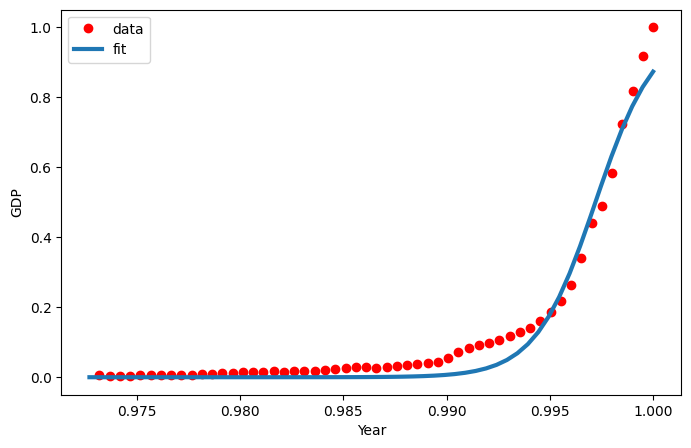

In [22]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [23]:
# split data into train/test
msk = np.random.rand(len(gdp_data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# buat model dengan train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# prediksi dengan test set
y_hat = sigmoid(test_x, *popt)

# metrik evaluasi
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -0.97


<h2>Modelling</h2>

<h3> Random Forest </h3>

<p>
Random forest adalah algoritma Machine Learning yang digunakan untuk mengembangkan model prediktif. Ini adalah metode ensemble yang menggabungkan banyak Decision Tree, di mana setiap pohon (tree) dilatih pada subset data yang berbeda. Klasifikasi akhir dibentuk berdasarkan hasil voting dari pohon yang terbentuk. Semakin banyak pohon yang digunakan, semakin baik akurasinya. Random forest digunakan dalam berbagai bidang seperti sistem rekomendasi ahli medis, analisis sentimen, analisis koefisien intensitas material, analisis kinerja spasial dalam bola basket, dan prediksi atrisi karyawan.

Untuk menguraikan lebih lanjut, berikut adalah beberapa poin penting tentang random forest:

<ul>
    <li>Random forest adalah jenis algoritme supervised learning yang dapat digunakan untuk tugas klasifikasi dan regresi.</li>
    <li>Ini adalah metode ensemble yang menggabungkan beberapa pohon keputusan untuk membuat prediksi akhir.</li>
    <li>Setiap pohon keputusan dalam random forest dilatih pada subset data yang berbeda, yang membantu mengurangi overfitting dan meningkatkan akurasi model.</li>
    <li>Random forest adalah algoritma yang kuat yang dapat menangani dataset besar dengan banyak fitur dan dapat digunakan untuk data kategorikal dan kontinu.</li>
    <li>Salah satu keuntungan dari random forest adalah bahwa ia menyediakan ukuran kepentingan fitur, yang dapat digunakan untuk mengidentifikasi variabel yang paling penting dalam model.</li>
    <li>Random forest banyak digunakan di berbagai bidang seperti keuangan, kesehatan, pemasaran, dan olahraga.</li>
</ul>

Singkatnya, random forest adalah algoritma pembelajaran mesin yang kuat yang dapat digunakan untuk mengembangkan model prediktif di berbagai bidang. Ini adalah metode ensemble yang menggabungkan beberapa pohon keputusan untuk membuat prediksi akhir, dan dikenal karena keakuratan dan kemampuannya untuk menangani set data yang besar
</p>

<h3>Majority Voting dalam Random Forest</h3>

<p>

1. <b>Bootstrap Aggregating (Bagging)</b> <br>
Random Forest dimulai dengan membuat beberapa Decision Tree, biasanya ratusan atau ribuan pohon. Setiap pohon dilatih pada subset acak dari data pelatihan, dengan penggantian. Proses ini dikenal sebagai bootstrap aggregating atau bagging. Bagging membantu memperkenalkan keragaman di antara pohon-pohon tersebut, karena setiap pohon melihat subset yang berbeda dari data.<br><br>

2. <b>Decision Tree</b> <br>
Setiap decision tree dalam Random Forest dilatih untuk memprediksi variabel target berdasarkan subset acak dari fitur-fitur pada setiap split. Hal ini lebih meningkatkan keragaman di antara pohon-pohon tersebut.<br><br>

3. <b>Prediksi</b> <br>
Begitu semua decision tree dilatih, mereka dapat digunakan untuk membuat prediksi pada data baru yang belum terlihat. Untuk tugas klasifikasi, setiap pohon memprediksi label kelas dari input, dan untuk tugas regresi, setiap pohon memprediksi nilai numerik.<br><br>

4. <b>Majority Voting (Pemungutan Suara Mayoritas)</b><br>
Setelah semua pohon membuat prediksi, hasil prediksi ini digabungkan dengan cara mayoritas voting. Artinya, kelas atau nilai yang paling sering diprediksi oleh pohon-pohon tersebut diambil sebagai prediksi akhir dari Random Forest.   
</p>    

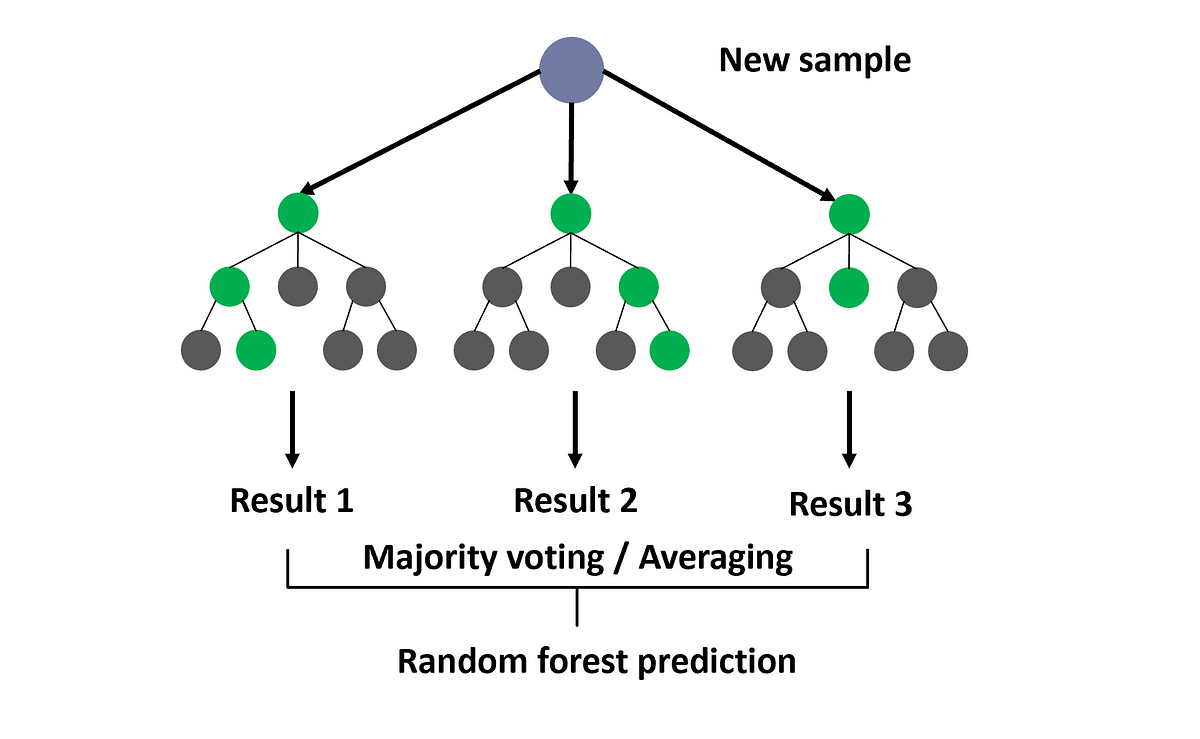

<h3>Random Forest Classifier</h3>

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [70]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [71]:
model_accuracy = accuracy_score(pred, y_test)

print("Nilai akurasi untuk base model: ", model_accuracy)

Nilai akurasi untuk base model:  0.7142857142857143


In [72]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1])

In [73]:
y_test

73     1
45     1
60     1
42     0
128    1
62     0
12     1
81     0
19     1
64     0
44     1
51     0
26     1
36     1
31     0
40     1
132    0
105    1
4      0
112    0
120    0
126    0
27     1
16     1
18     1
10     1
66     1
69     1
Name: Performance, dtype: int32

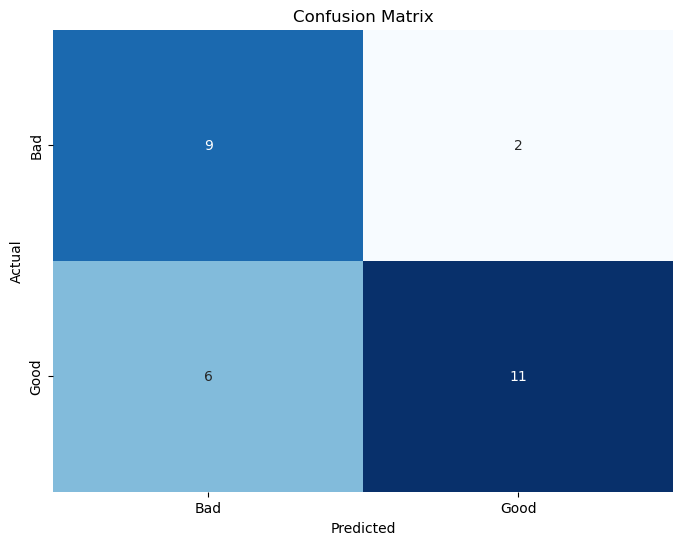

In [74]:
conf_matrix = confusion_matrix(y_test, pred)

# Plotting confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Bad', 'Good'],
            yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [75]:
20 / 28 * 100

71.42857142857143

<h3>Logistic Regression</h3>

<p></p>

<p>Regresi logistik adalah metode analisis statistik yang digunakan untuk memprediksi hasil biner berdasarkan pengamatan sebelumnya terhadap kumpulan data. Ini adalah algoritme klasifikasi yang digunakan untuk menghitung probabilitas terjadinya peristiwa biner dan untuk menangani masalah klasifikasi. Regresi logistik digunakan untuk memprediksi kemungkinan semua jenis hasil "ya" atau "tidak", seperti memprediksi apakah email yang masuk adalah spam atau bukan spam, atau memprediksi apakah transaksi kartu kredit adalah penipuan atau bukan penipuan. Regresi logistik penting karena mengubah perhitungan yang rumit seputar probabilitas menjadi masalah aritmatika yang mudah.</p>

<h4>Cara Kerja</h4>

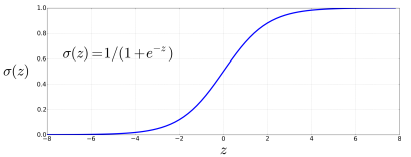

<p>1. Regresi logistik menggunakan fungsi logistik (atau fungsi sigmoid) untuk memodelkan probabilitas. Fungsi sigmoid memiliki bentuk kurva S dan dapat mengubah setiap nilai input ke dalam rentang antara 0 dan 1, yang bisa diartikan sebagai probabilitas.</p>

<p>Di mana z adalah kombinasi linier dari fitur (variabel independen)</p>

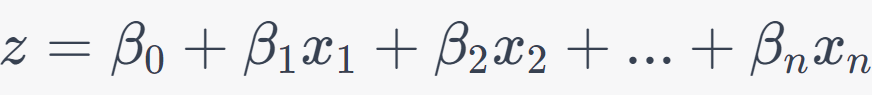

<p><b>Estimasi Koefisien</b>: Tujuan dari regresi logistik adalah untuk menemukan koefisienβ yang terbaik, sehingga model dapat memprediksi probabilitas dengan akurat. Ini dilakukan dengan memaksimalkan fungsi log-likelihood dengan teknik seperti "gradient descent".</p>

<p><b>Ambang Batas (Threshold)</b>: Meskipun regresi logistik memberikan probabilitas, dalam banyak kasus kita perlu keputusan kategorikal sebagai hasil akhir (misalnya, spam atau bukan spam). Untuk itu, kita menetapkan ambang batas. Pada klasifikasi biner, ambang batas yang umumnya digunakan adalah 0,5:

<ul>    
    <li>Jika P(Y=1)>0,5, maka prediksi adalah kelas 1.</li>
    <li>Jika P(Y=1)≤0,5, maka prediksi adalah kelas 0.</li>
</ul>
</p>

In [76]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()

X3 = iris.data
y3 = (iris.target == 0).astype(int)  # Convert to binary: 1 if 'setosa', 0 otherwise

In [77]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

In [79]:
# instantiate the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train3)

LogisticRegression(random_state=42)

In [80]:
y_pred3 = clf.predict(X_test_scaled)

In [81]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred3)))

Model accuracy score: 1.0000


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h3>K-Nearest Neighbor (K-NN)</h3>

<p>
K-nearest neighbors (K-NN) adalah algoritma machine learning yang dapat digunakan untuk tugas klasifikasi dan regresi. Algoritma ini merupakan algoritma non-parametrik, yang berarti bahwa algoritma ini tidak membuat asumsi apa pun tentang distribusi data. Sebaliknya, algoritma ini menggunakan seluruh kumpulan data untuk membuat prediksi. Berikut adalah beberapa detail tambahan tentang K-NN:

<ul>
    <li>K-NN bekerja dengan menemukan K neighbour terdekat ke titik data yang diberikan berdasarkan metrik jarak seperti jarak Euclidean atau jarak Manhattan.</li>
    <li>Nilai K adalah hyperparameter yang dapat disetel untuk meningkatkan akurasi model. Nilai K yang lebih kecil akan menghasilkan model yang lebih fleksibel yang lebih rentan terhadap overfitting, sementara nilai K yang lebih besar akan menghasilkan model yang lebih kaku yang lebih rentan terhadap underfitting.</li>
    <li>K-NN dapat digunakan untuk tugas klasifikasi dan regresi. Dalam klasifikasi, outputnya adalah label kelas, sedangkan dalam regresi, outputnya adalah nilai kontinu.</li>
    <li>K-NN sensitif terhadap pilihan metrik jarak dan penskalaan data. Penting untuk melakukan preprocessing data sebelum menerapkan K-NN untuk memastikan hasilnya akurat.</li>
</ul>
</p>

In [83]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

X2, y2 = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.5)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [84]:
feature_columns = [f"Feature_{i+1}" for i in range(X_train2.shape[1])]
df_train = pd.DataFrame(X_train2, columns=feature_columns)
df_train['Label'] = y_train2

In [85]:
df_train.head()

,Feature_1,Feature_2,Label
0,3.292257,2.711048,1
1,-2.421885,7.299831,0
2,6.391552,2.354801,1
3,4.448002,0.539859,1
4,4.540759,0.156645,1


In [86]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [87]:
# Membuat model KNN dan melatihnya
k = 3
model2 = KNeighborsClassifier(n_neighbors=k)
model2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=3)

In [88]:
y_pred2 = model2.predict(X_test2)

In [89]:
accuracy = accuracy_score(y_test2, y_pred2)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")


Akurasi Model: 100.00%


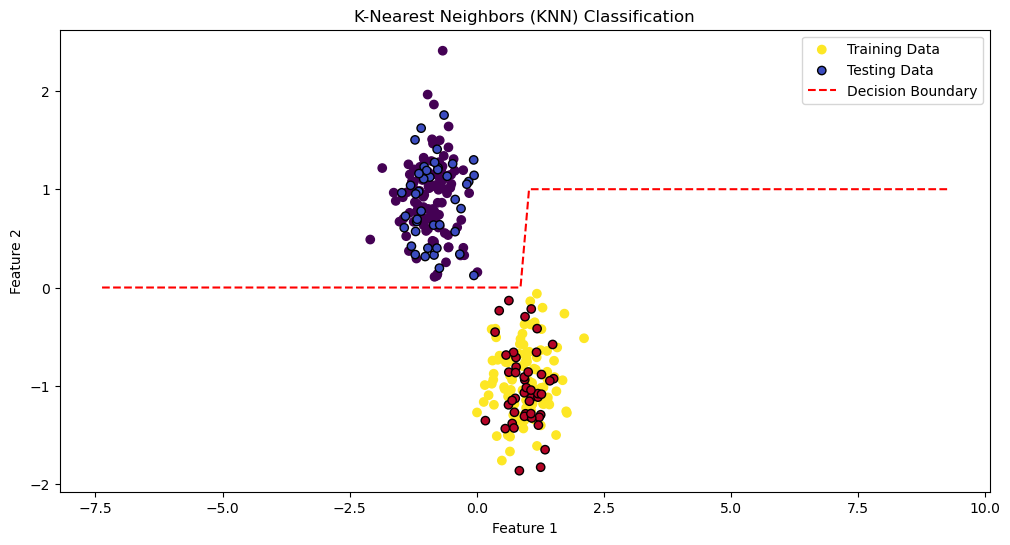

In [90]:
plt.figure(figsize=(12, 6))

# Memvisualisasikan data dan batas keputusan
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, cmap='viridis', label='Training Data')
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y_pred2, cmap='coolwarm', edgecolors='black', label='Testing Data')

# Plot batas keputusan
decision_boundary = np.linspace(min(X2[:, 0]), max(X2[:, 0]), 100)
decision_boundary_predictions = model2.predict(np.column_stack((decision_boundary, np.ones(len(decision_boundary)))))
plt.plot(decision_boundary, decision_boundary_predictions, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors (KNN) Classification')
plt.legend()
plt.show()

In [91]:
confusion_matrix(y_test2, y_pred2)

array([[42,  0],
       [ 0, 48]], dtype=int64)